# PRCP-1000-Portugese Bank


- **Problem Statement**

    - **Task 1:** Prepare a complete data analysis report on the given data.

    - **Task 2:** Create a predictive model which will help the bank marketing team to know which customer will buy the product.

    - **Task3:** Suggestions to the Bank market team to make customers buy the product.


- **Dataset Link:**
This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. 


- **Attribute Information:**
    - **Input variables:**
        1 – Age (numeric)
        2 – Job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
        3 – Marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; Note: 'divorced' means divorced or widowed)
        4 – Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high-school', 'illiterate', 'professional-course', 'university-degree', 'unknown')
        5 – Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
        6 – Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
        7 – Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
    - **related with the last contact of the current campaign:**
        8 – Contact: contact communication type (categorical: 'cellular', 'telephone')
        9 – Month: Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
        10 – Day_Of_Week: Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
        11 – Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    - **Other attributes:**
        12 – Campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
        13 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
        14 – Previous: number of contacts performed before this campaign and for this client (numeric)
        15 – Poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
    - ** social and economic context attributes**
        16 – emp.var.rate: employment variation rate - quarterly indicator (numeric)
        17 – cons.price.idx: consumer price index - monthly indicator (numeric)
        18 – cons.conf.idx: consumer confidence index - monthly indicator (numeric)
        19 – euribor3m: euribor 3-month rate - daily indicator (numeric)
        20 – nr.employed: number of employees - quarterly indicator (numeric)
        Output variable (desired target):
        21 – y - has the client subscribed a term deposit? (binary: 'yes', 'no')

- **Model Comparison Report**
    - Create a report stating the performance of multiple models on this data and suggest the best model for production.

- **Report on Challenges faced**
    - Create a report which should include challenges you faced on data and what technique used with proper reason.

- **Note:** All above tasks have to be done on a single Jupyter notebook and share the same for the final submission.

In [1]:
# Import important libraries
import pandas as pd
import numpy as np

# Import important libraries visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import important libraries to handle unbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Library for statistical operations
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import models algorithms
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost


# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load file with variable named as "bank"
bank = pd.read_csv('bank-additional-full.csv', sep=";")

In [3]:
# Display dataset
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Basic Checks

In [4]:
# Show first 5 rows of data
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Show last 5 rows of data
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# Print shape of the dataset
print("Shape of the Data: ", bank.shape)

Shape of the Data:  (41188, 21)


In [7]:
# It will show all details of data 
# Such as Data Types, Total entries, Total numbers of columns, 
# Null values and memory usage
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. No missing value found

In [8]:
# It will give all statistical information of columns having numerical data type
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Observations:
    1. Age group vary between 17 and 98 years
    2. Average duration is 258 seconds (which is almost 4 minutes)
    3. On an average, every client is contacted 3 times
    4. Most of clients are not contacted
    5. Number of contacts performed before this campaign vary between 0 and 1 

In [9]:
# It will give all statistical information of columns having categorical data type
bank.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Observations:
    1. Most of clients are administrators
    2. Most of customers are married
    3. Most of customers have university degree
    4. Most of customers haven't defaulters.
    5. Most of customers have housing 
    6. Most of customers are contacted in the May 
    7. Most of customers have cellular phones.

In [10]:
# Finding duplicates observations
bank.duplicated().sum()

12

In [11]:
# It will show target variable observations count 
bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
# Checking percentage of null values in each columns
(bank.isnull().sum()/(len(bank)))*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [13]:
# Names of all columns
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
# Numeric Columns in dataset
numeric_data = bank.select_dtypes(include="number") # select_dtypes selects data with numeric features
bank_numeric = numeric_data.columns 
print("Number of columns having numerical values:", len(bank_numeric))
print("\nNames of columns having numerical values:", list(bank_numeric))

Number of columns having numerical values: 10

Names of columns having numerical values: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [15]:
# Categorical Columns in dataset
cat_data = bank.select_dtypes(exclude="number") 
bank_categorical = cat_data.columns 
print("Number of columns having categorical value:", len(bank_categorical))
print("\n""Names of columns having categorical value:\n", list(bank_categorical))

Number of columns having categorical value: 11

Names of columns having categorical value:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# Univariant Analysis

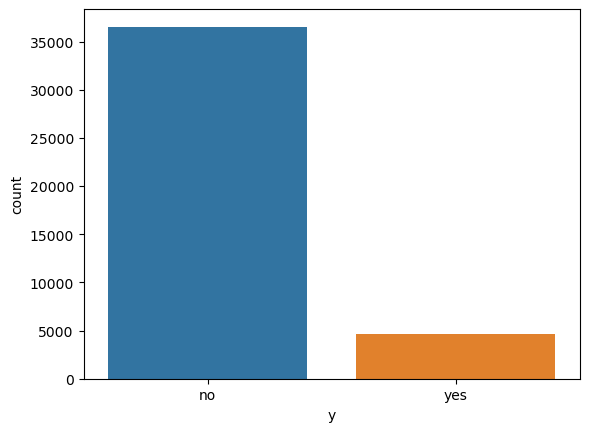

In [16]:
# Count plot of target varible's observations
sns.countplot(x='y', data=bank)
plt.show()

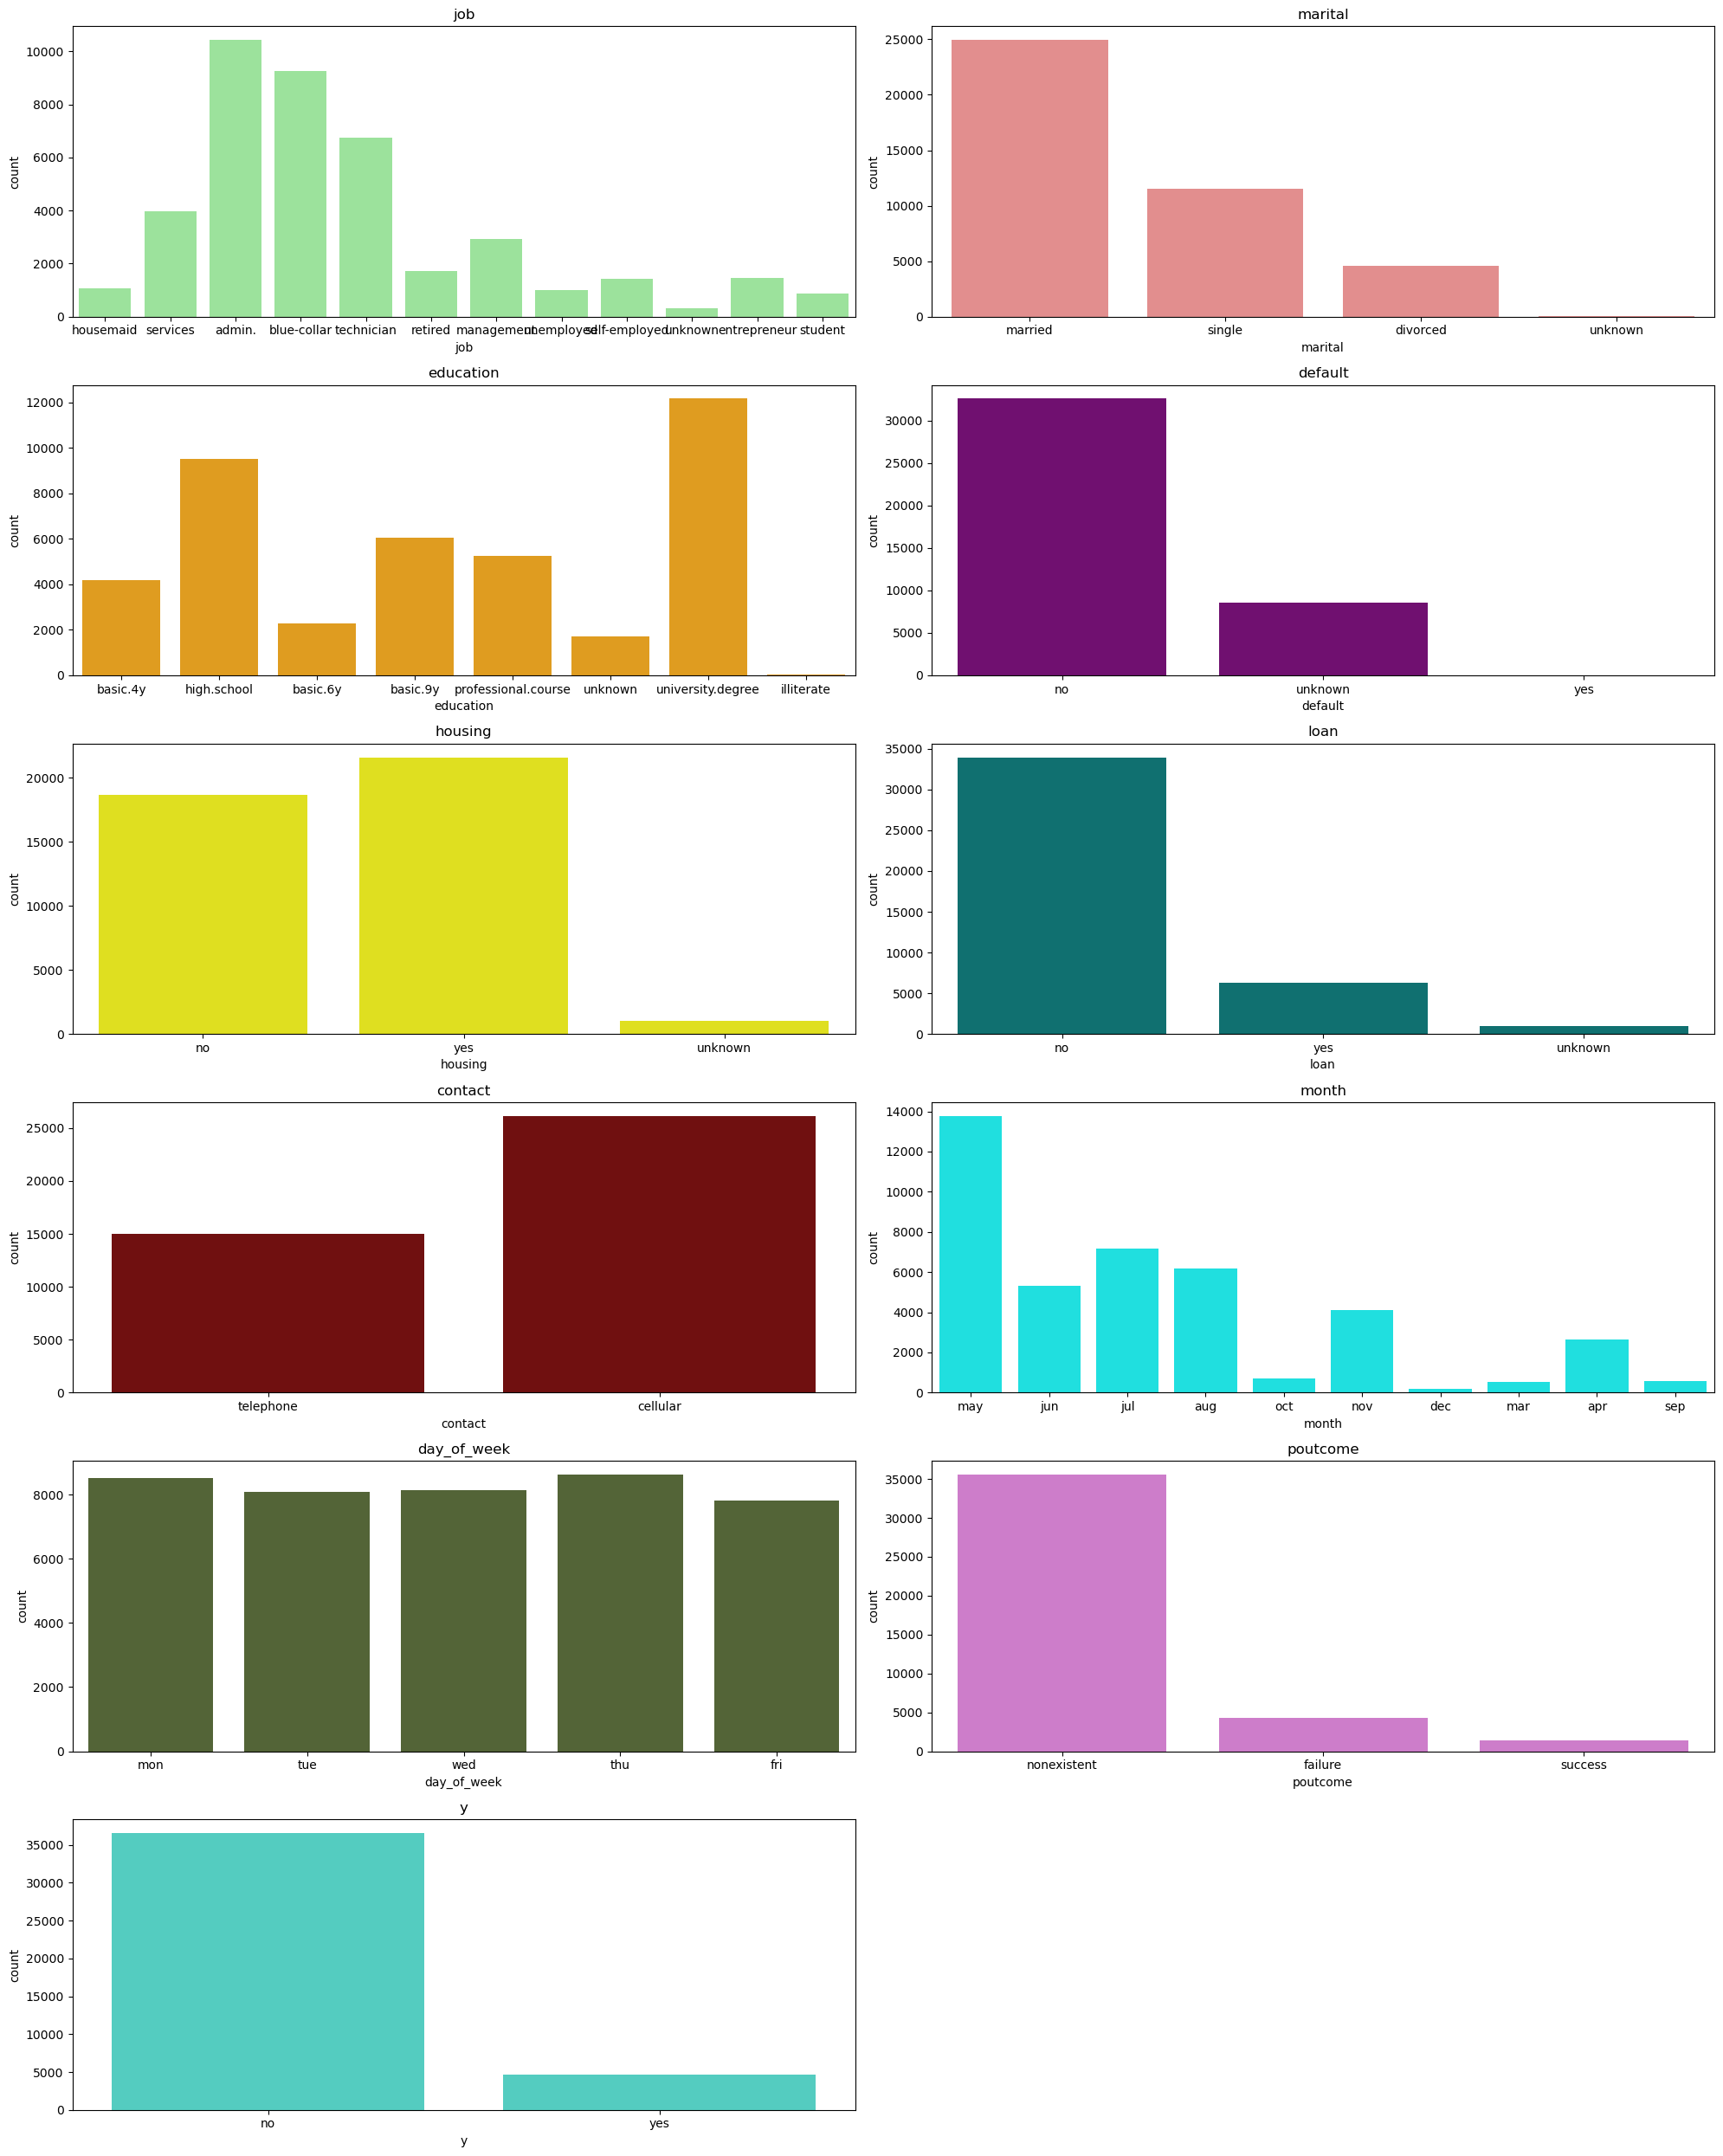

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the categorical columns
categorical_col = bank.select_dtypes(include=['object']).columns

# It will use represent different graphs with different colors
colors = [
    'skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 
    'yellow',  'teal', 'maroon', 'cyan', 'darkolivegreen', 'orchid', 'turquoise'
]

# Plotting a countplot for each of the categorical variables
plt.figure(figsize=(20, 25))  # Canvas size

for i, column in enumerate(categorical_col, 1):
    plt.subplot(6, 2, i)  
    sns.countplot(x=column, data=bank, palette=[colors[i]])
    
    plt.title(column)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Observations
    1. Most of calls were made to Administrators, followed by blue-collar workers and Technician
    2. Most of people are married, followed by single and divorcee.
    3. Most of people are university- degree holder, followed by high-school and Basic 9years.
    4. Only 3 observations are defaulters.
    5. Most of the people have houses
    6. Most of people don't have loans
    7. More than 25000 have cellular phones, almost 15000 people have telephone
    8. Most of the calls were made in months of May, July and August.
    9. Very few calls were made in the months of September, March and December.
    10. On an average all days numbers of calls were constant
    11. More than 35000 people, are not have outputs.

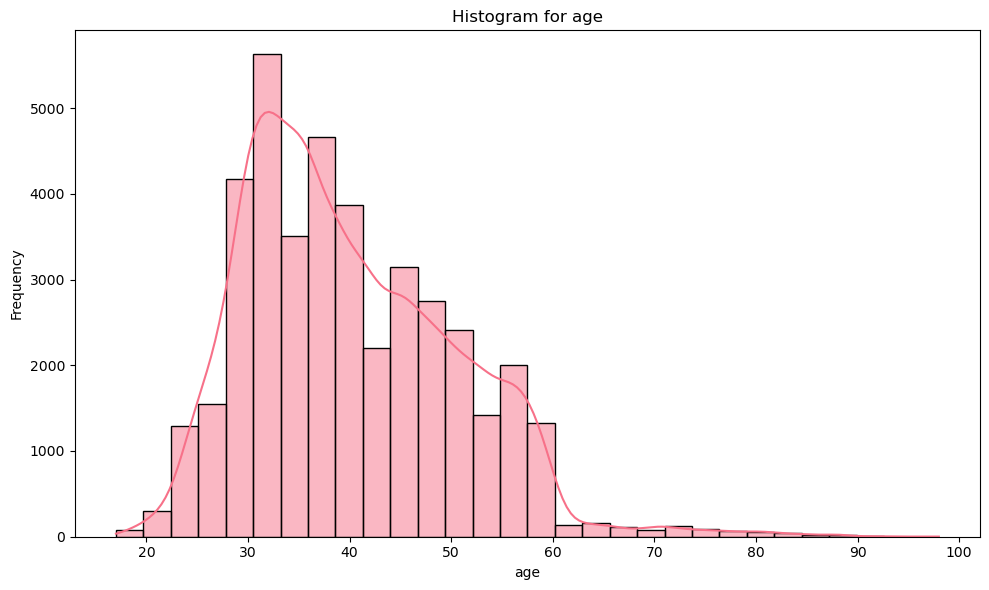

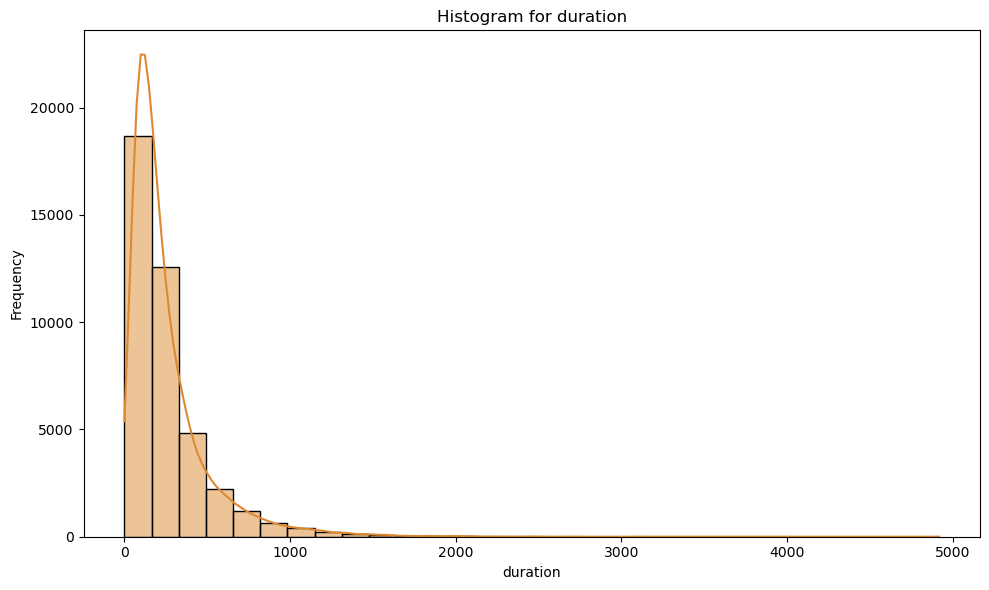

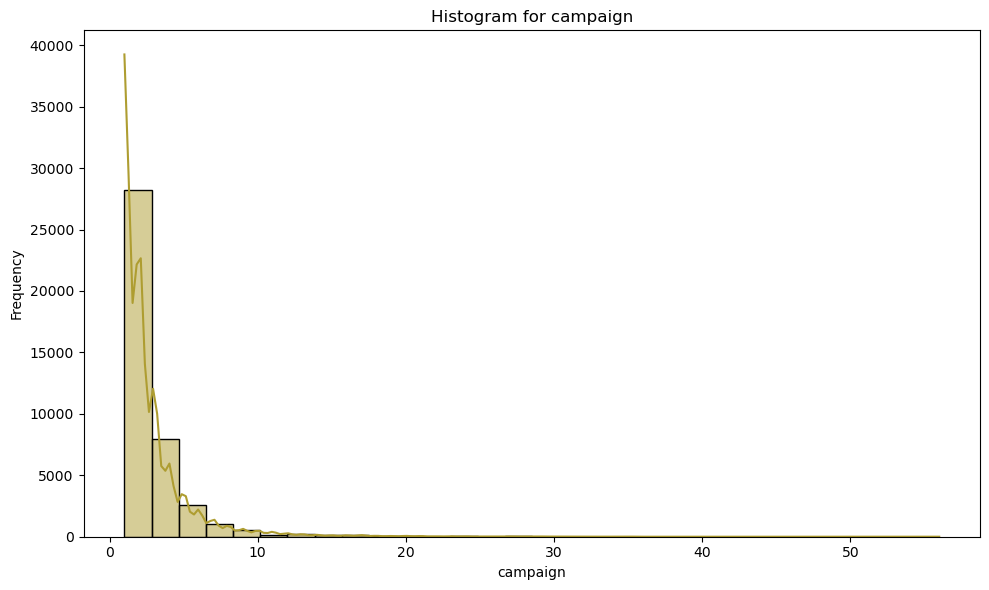

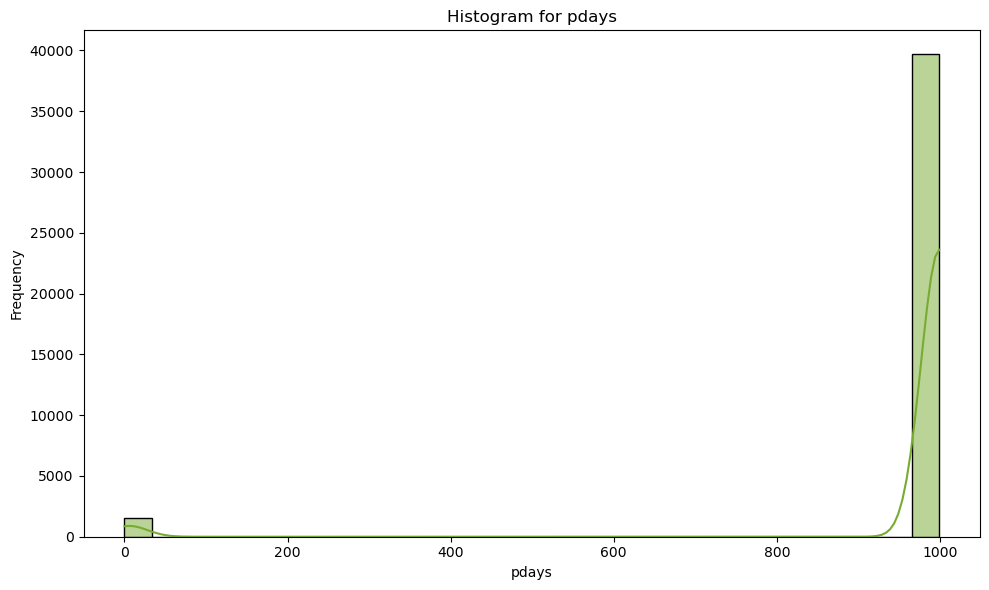

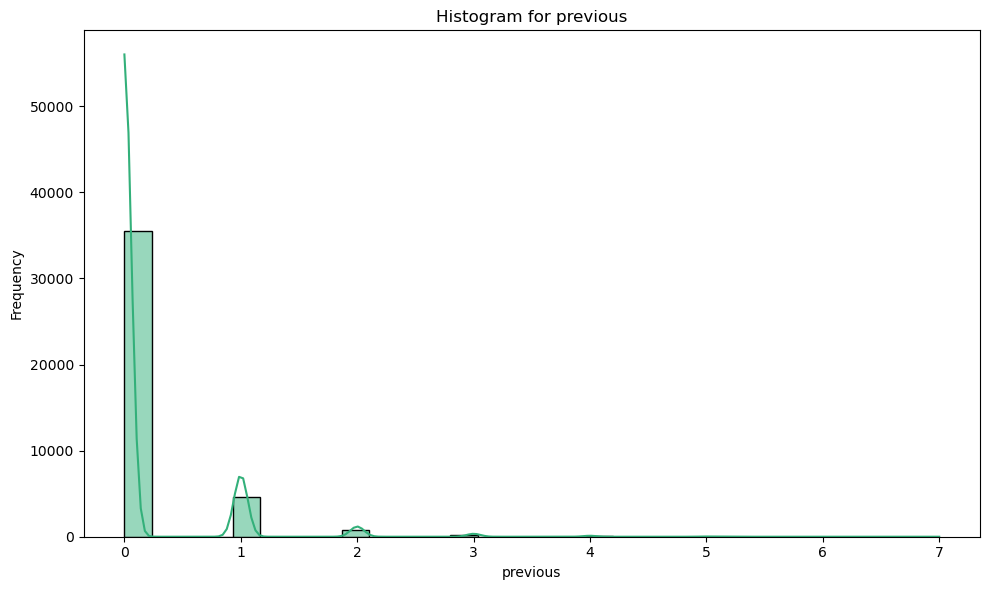

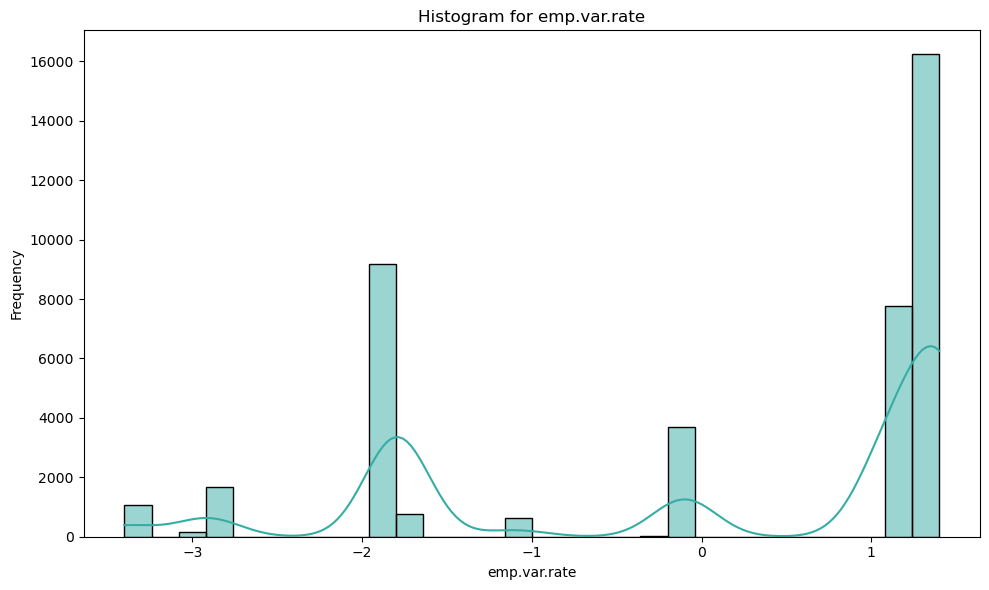

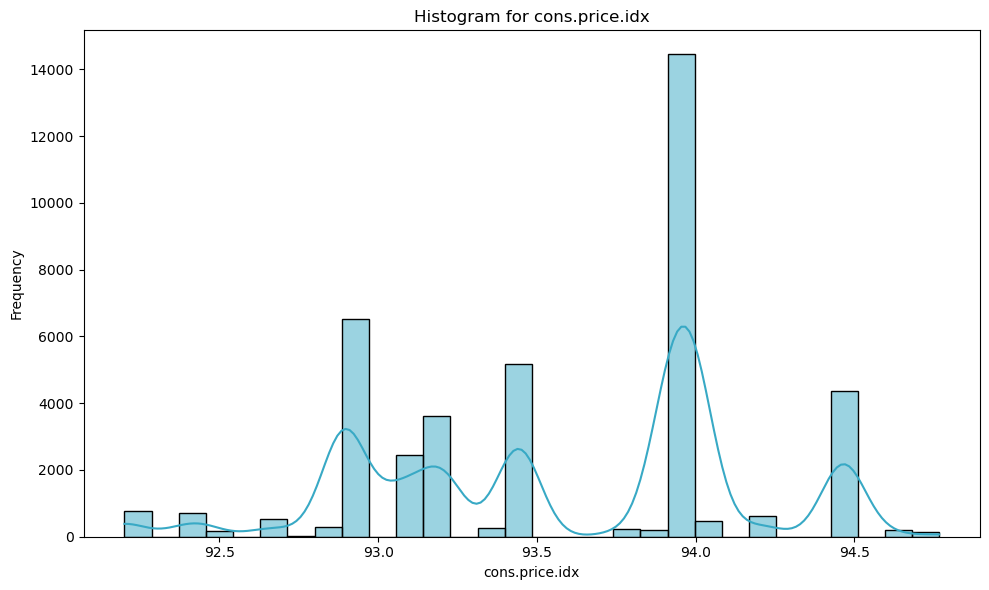

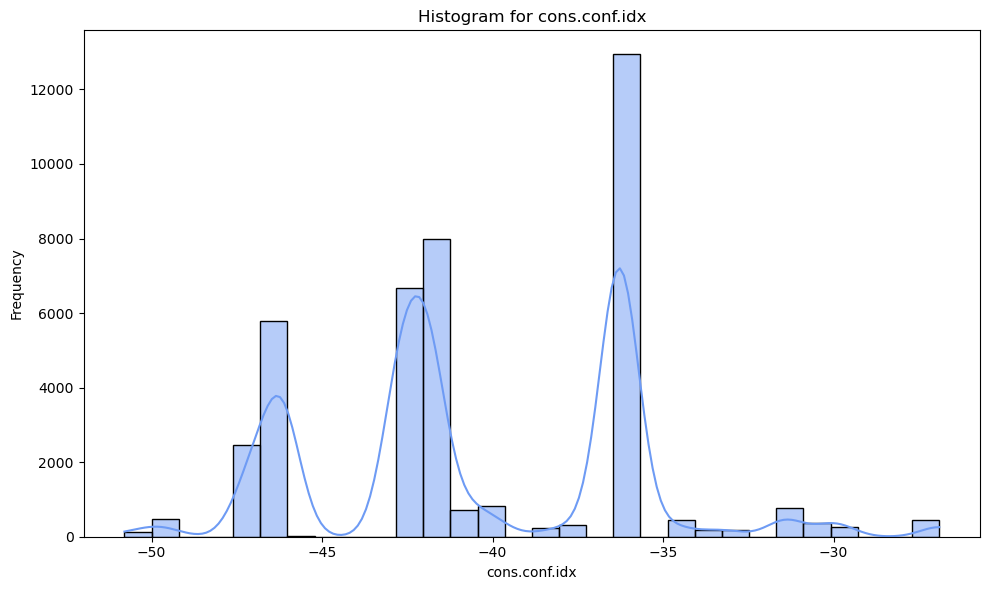

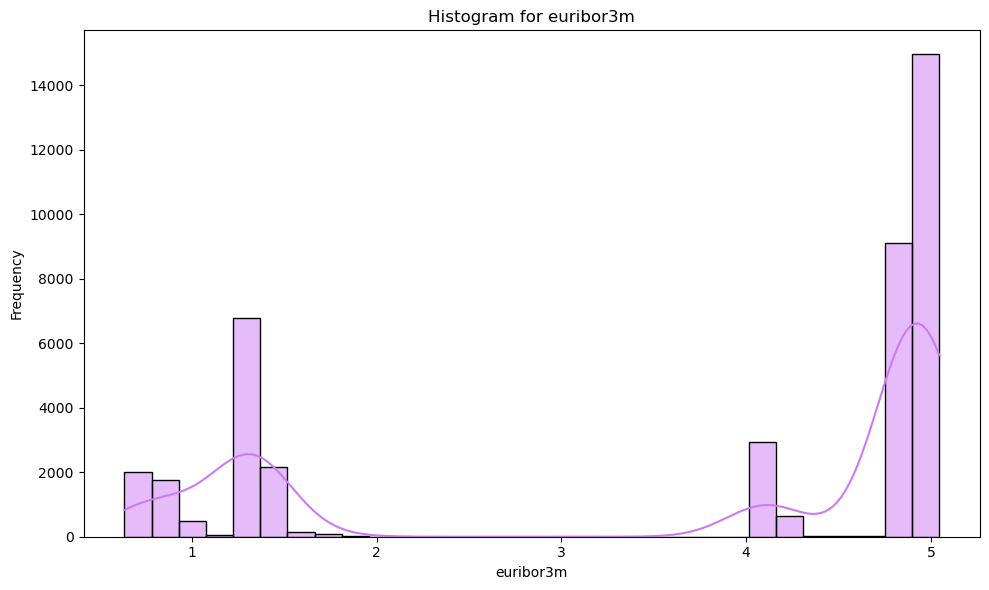

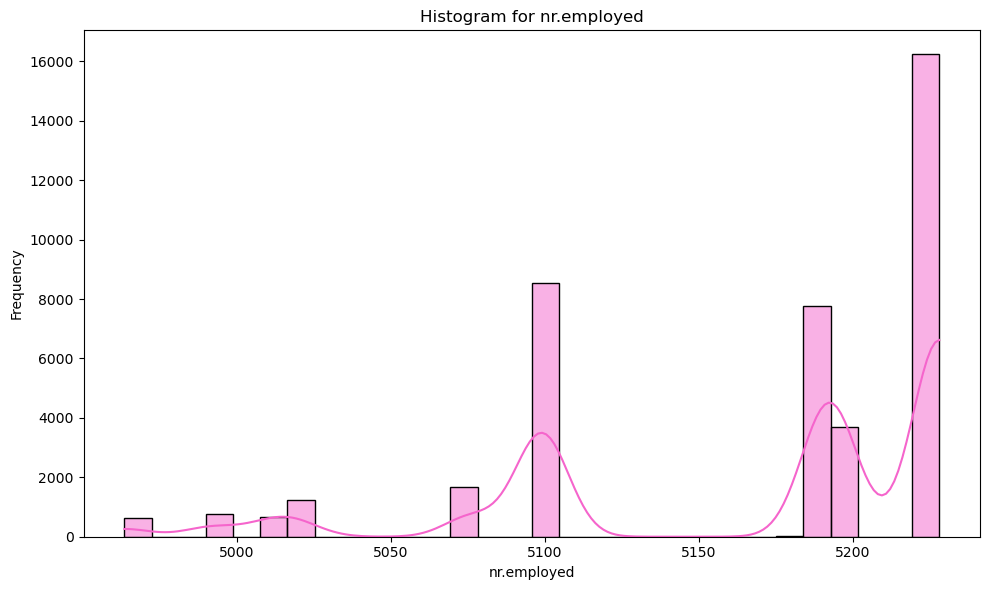

In [18]:
# Set a color palette with different colors for each histogra
colors = sns.color_palette("husl", n_colors=len(bank_numeric))

# Plotting a histogram for each continuous variable with different colors
for i, column in enumerate(bank_numeric):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=bank, x=column, bins=30, color=colors[i], kde=True)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

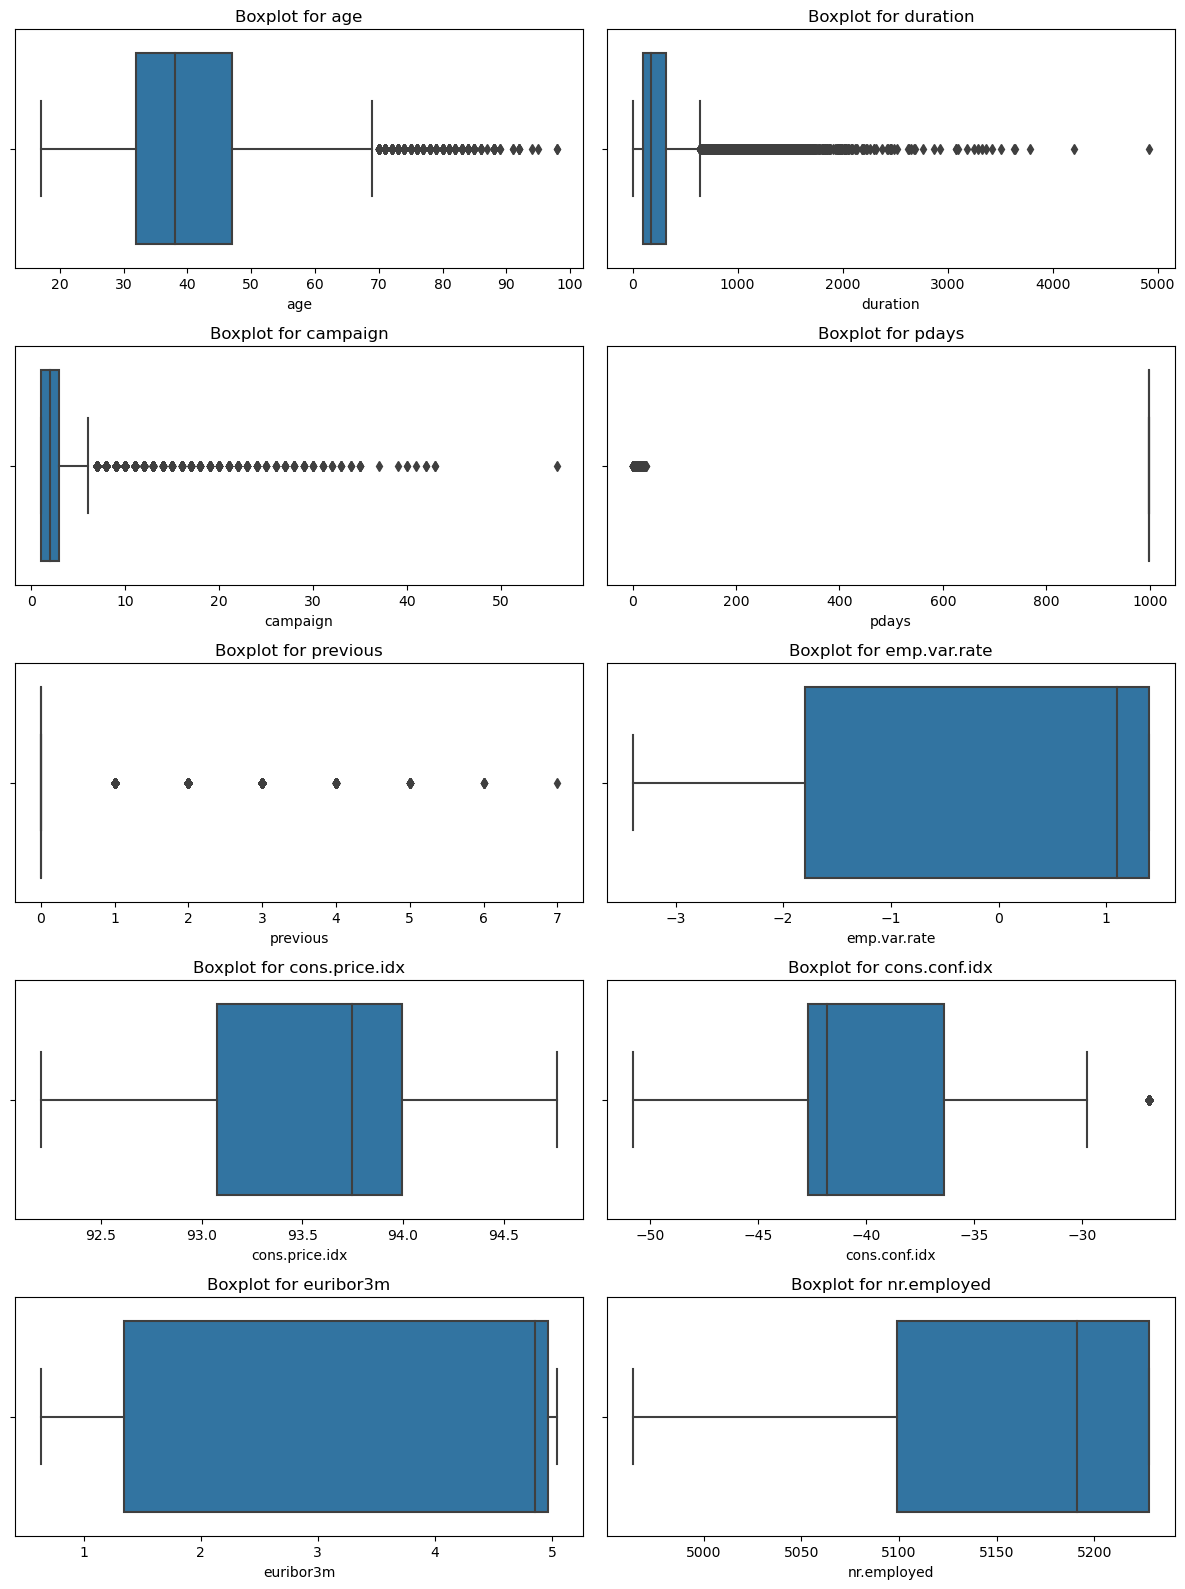

In [19]:
# Plotting of BoxPlot to check presence of Outliers

fig, axes = plt.subplots(5, 2, figsize=(12, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(bank_numeric):
    sns.boxplot(x=column, data=bank, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Observations:
    Outliers found in columns
        1. Age
        2. Duration
        3. Campaign
        4. pdays
        5. previous
        6. cons.conf.idx        

# Bivariant Analysis

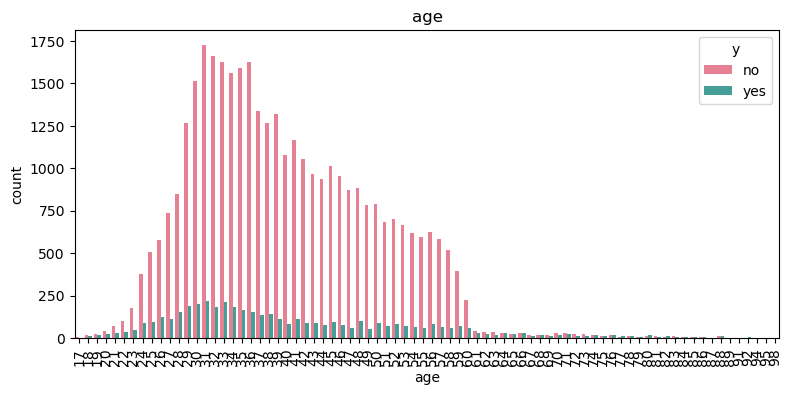

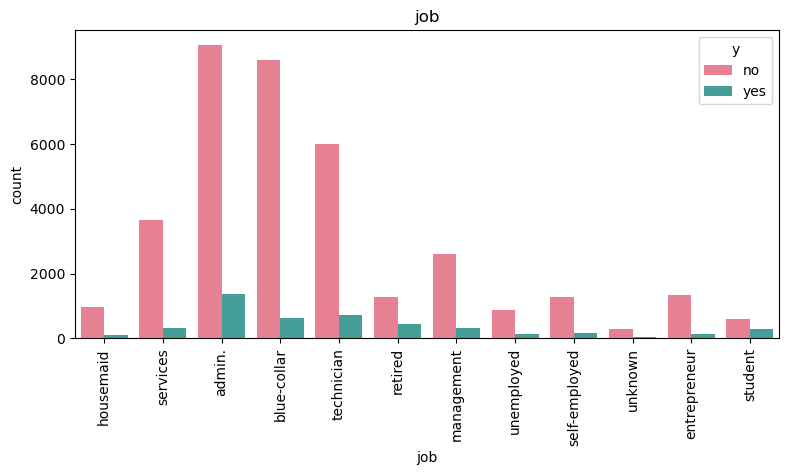

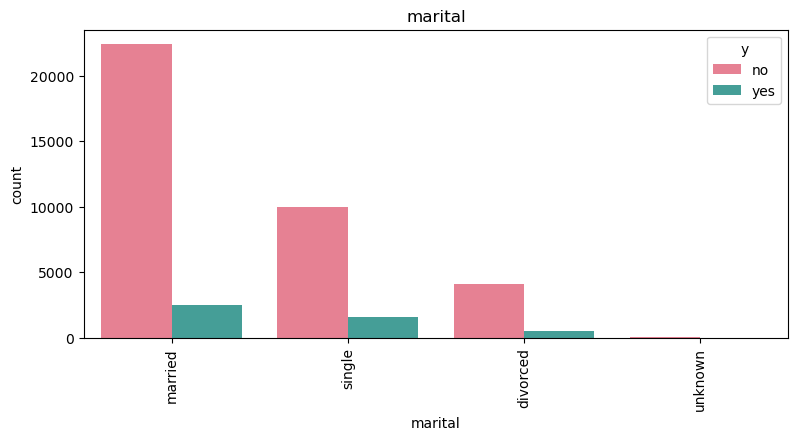

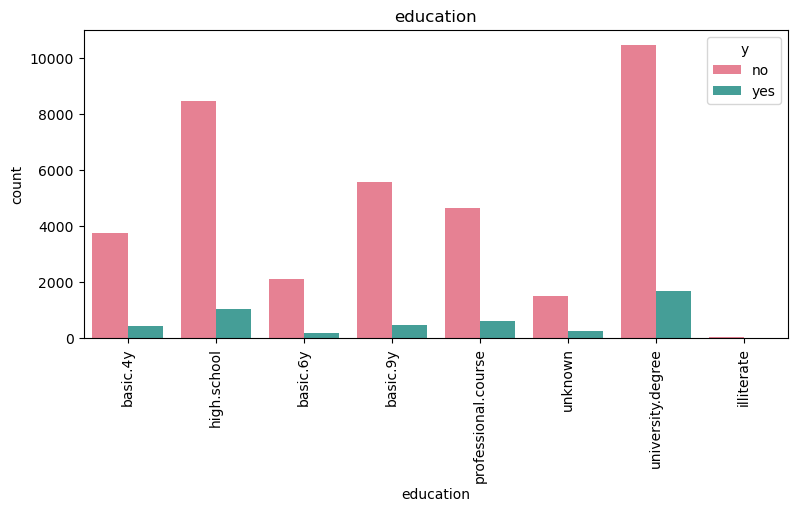

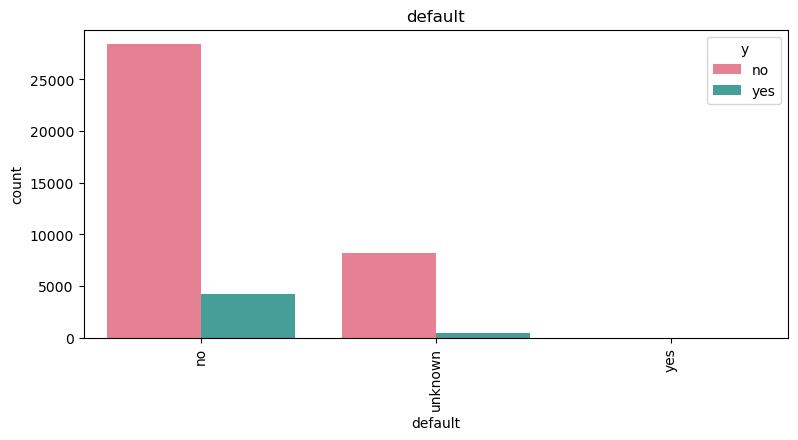

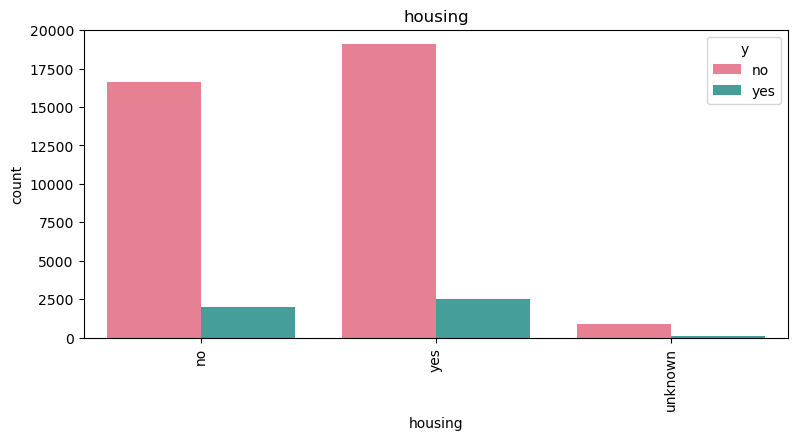

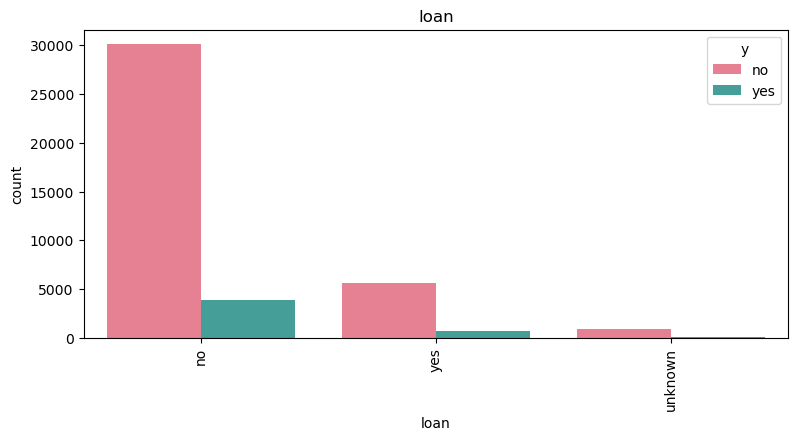

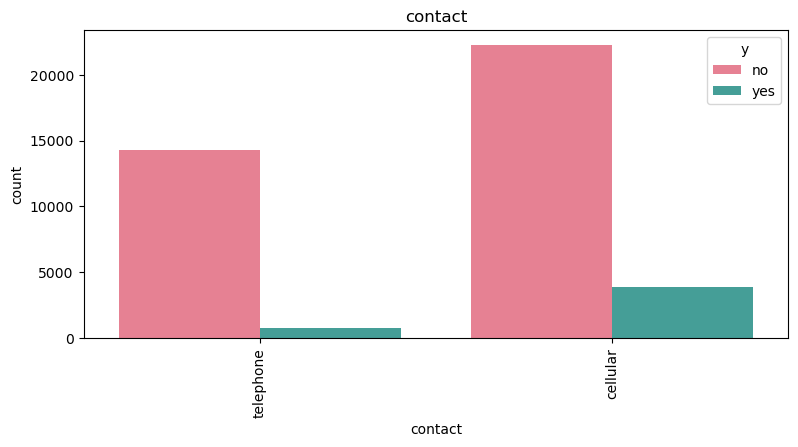

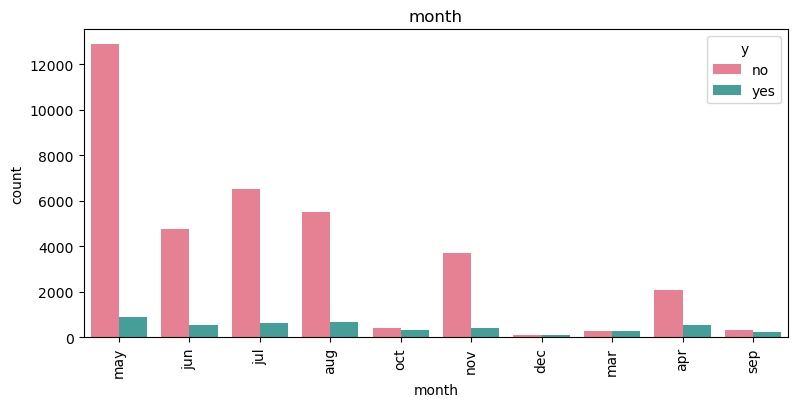

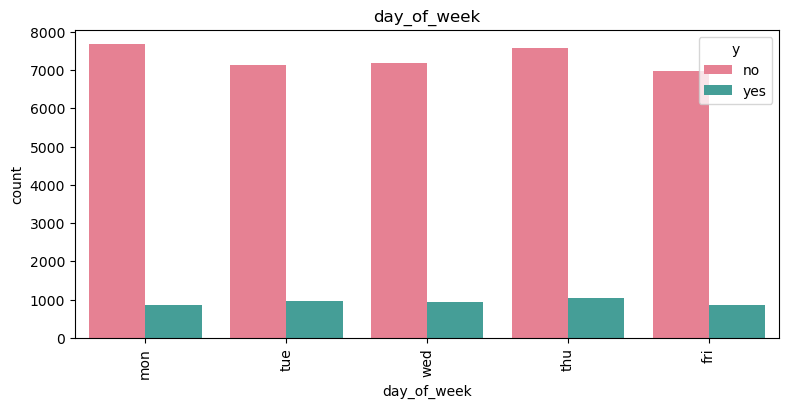

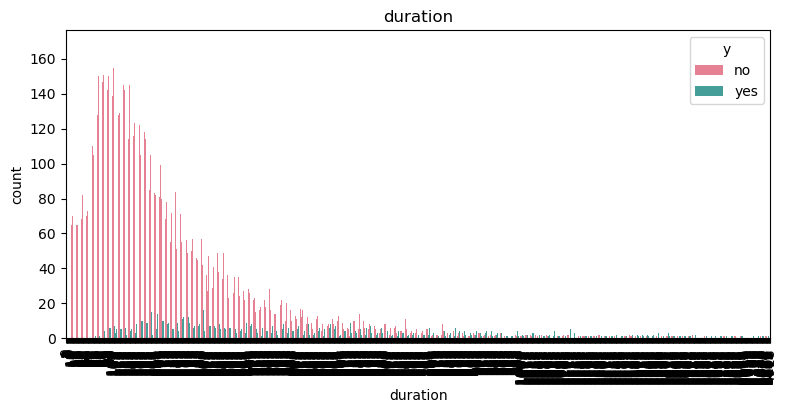

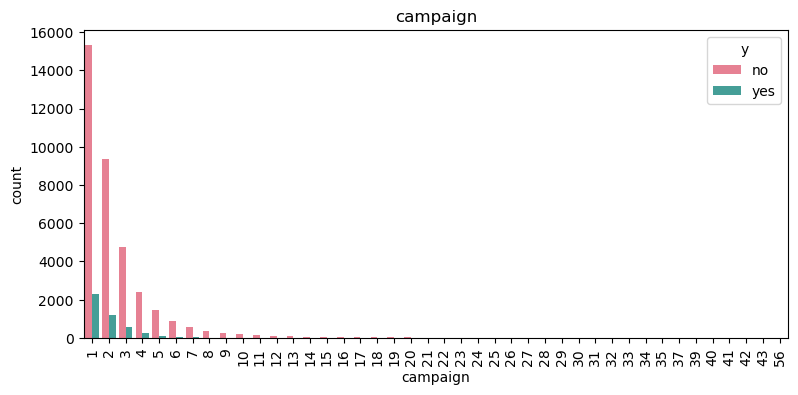

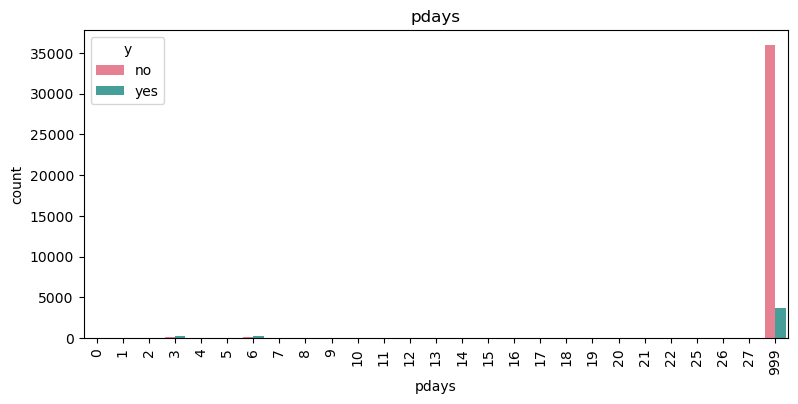

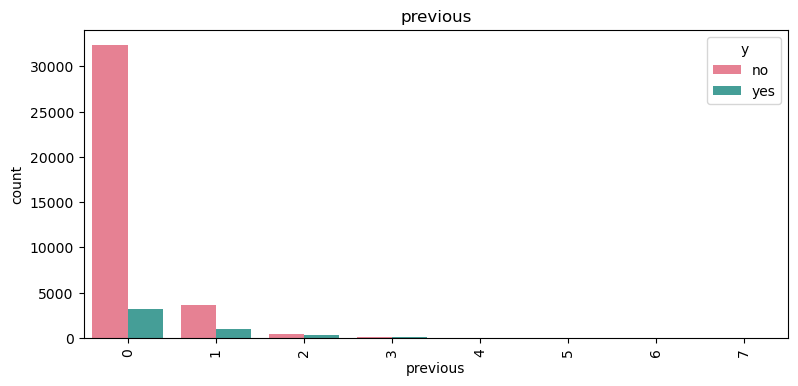

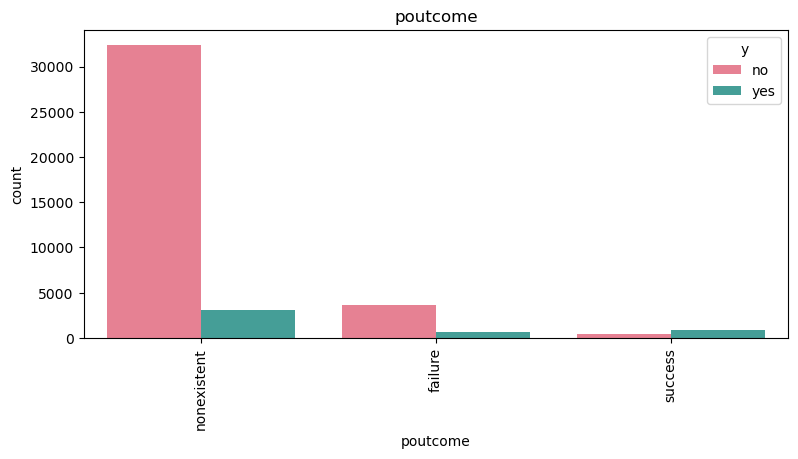

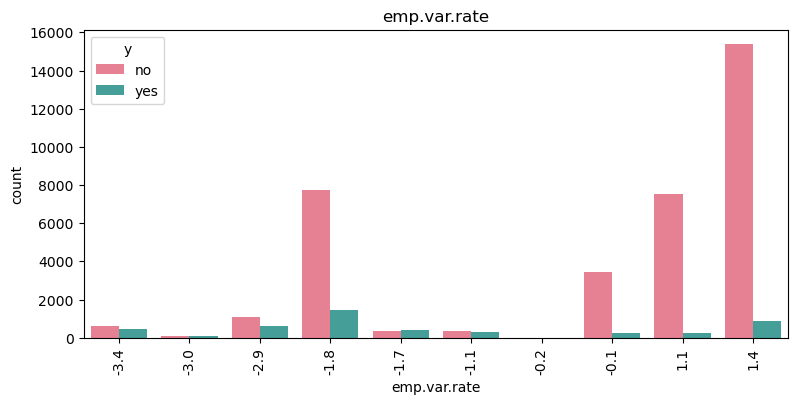

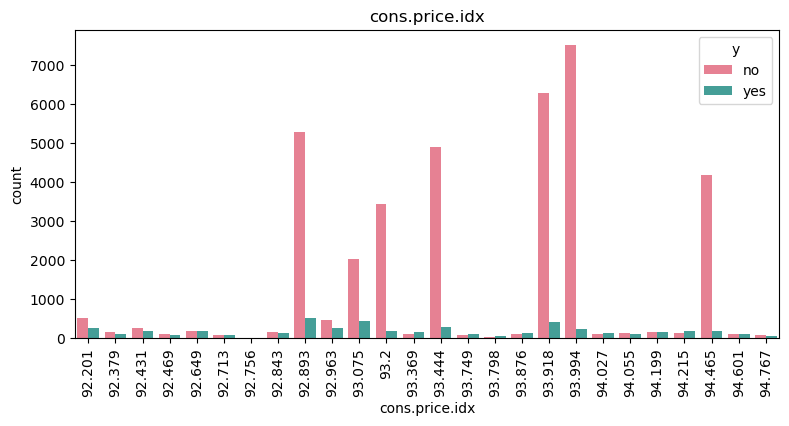

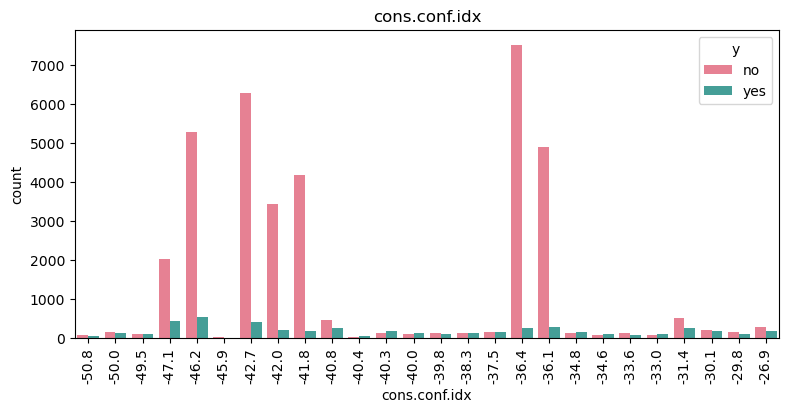

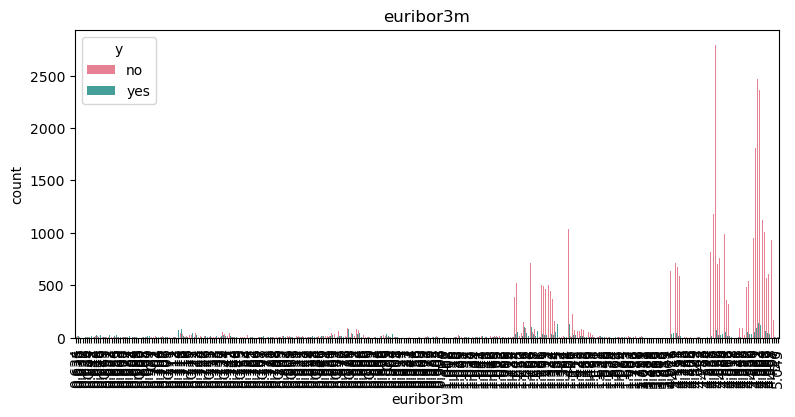

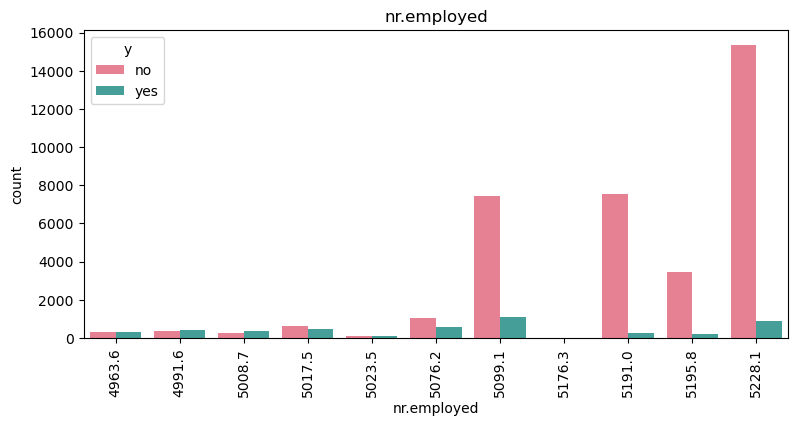

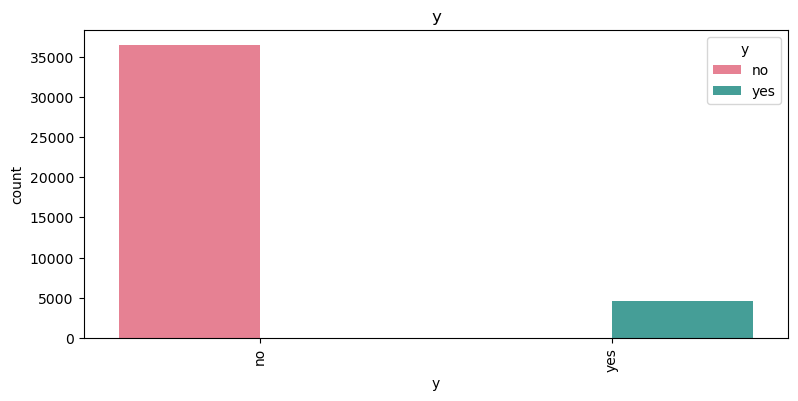

In [20]:
# Setting a color palette with different colors for each bar
palette = sns.color_palette("husl", n_colors=len(bank['y'].unique()))

# Plotting a count plot for each categorical variable with different colors
for column in bank:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=bank[column], hue=bank['y'], data=bank, palette=palette)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

In [21]:
# Creating crosstable with represent to Target Variable "y"
categorical_columns = bank.select_dtypes(include="object").columns

for cat_col in bank.columns:
    cross_tab = pd.crosstab(bank[cat_col], bank['y'], margins=True, margins_name='Total')
    print(f"\n\nCross-tabulation for {cat_col}:\n")
    print(cross_tab.to_markdown())
    print("\n" + "*" * 100 + "\n")



Cross-tabulation for age:

| age   |    no |   yes |   Total |
|:------|------:|------:|--------:|
| 17    |     3 |     2 |       5 |
| 18    |    16 |    12 |      28 |
| 19    |    22 |    20 |      42 |
| 20    |    42 |    23 |      65 |
| 21    |    73 |    29 |     102 |
| 22    |   101 |    36 |     137 |
| 23    |   178 |    48 |     226 |
| 24    |   377 |    86 |     463 |
| 25    |   505 |    93 |     598 |
| 26    |   576 |   122 |     698 |
| 27    |   737 |   114 |     851 |
| 28    |   850 |   151 |    1001 |
| 29    |  1267 |   186 |    1453 |
| 30    |  1512 |   202 |    1714 |
| 31    |  1727 |   220 |    1947 |
| 32    |  1662 |   184 |    1846 |
| 33    |  1623 |   210 |    1833 |
| 34    |  1561 |   184 |    1745 |
| 35    |  1592 |   167 |    1759 |
| 36    |  1626 |   154 |    1780 |
| 37    |  1338 |   137 |    1475 |
| 38    |  1264 |   143 |    1407 |
| 39    |  1318 |   114 |    1432 |
| 40    |  1077 |    84 |    1161 |
| 41    |  1165 |   113 |    1278 |



Cross-tabulation for campaign:

| campaign   |    no |   yes |   Total |
|:-----------|------:|------:|--------:|
| 1          | 15342 |  2300 |   17642 |
| 2          |  9359 |  1211 |   10570 |
| 3          |  4767 |   574 |    5341 |
| 4          |  2402 |   249 |    2651 |
| 5          |  1479 |   120 |    1599 |
| 6          |   904 |    75 |     979 |
| 7          |   591 |    38 |     629 |
| 8          |   383 |    17 |     400 |
| 9          |   266 |    17 |     283 |
| 10         |   213 |    12 |     225 |
| 11         |   165 |    12 |     177 |
| 12         |   122 |     3 |     125 |
| 13         |    88 |     4 |      92 |
| 14         |    68 |     1 |      69 |
| 15         |    49 |     2 |      51 |
| 16         |    51 |     0 |      51 |
| 17         |    54 |     4 |      58 |
| 18         |    33 |     0 |      33 |
| 19         |    26 |     0 |      26 |
| 20         |    30 |     0 |      30 |
| 21         |    24 |     0 |      24 |
| 22         |    17 | 



Cross-tabulation for nr.employed:

| nr.employed   |    no |   yes |   Total |
|:--------------|------:|------:|--------:|
| 4963.6        |   334 |   301 |     635 |
| 4991.6        |   370 |   403 |     773 |
| 5008.7        |   281 |   369 |     650 |
| 5017.5        |   617 |   454 |    1071 |
| 5023.5        |    84 |    88 |     172 |
| 5076.2        |  1069 |   594 |    1663 |
| 5099.1        |  7442 |  1092 |    8534 |
| 5176.3        |     9 |     1 |      10 |
| 5191.0        |  7523 |   240 |    7763 |
| 5195.8        |  3451 |   232 |    3683 |
| 5228.1        | 15368 |   866 |   16234 |
| Total         | 36548 |  4640 |   41188 |

****************************************************************************************************



Cross-tabulation for y:

| y     |    no |   yes |   Total |
|:------|------:|------:|--------:|
| no    | 36548 |     0 |   36548 |
| yes   |     0 |  4640 |    4640 |
| Total | 36548 |  4640 |   41188 |

************************************

# Observations:
    1. Most of the people to agree for term deposit are in age group of 23 to 45.
    2. Most of the people to agree for term deposit are from admin., blue-collar and technician.
    3. Most of the people to agree for term deposit are married and divorced (around 11%)
    4. Most of the people to agree for term deposit are education of university degree (around 13%), followed by professional course and high school
    5. Very less observations, but all defaulter haven't opted for term deposit.
    6. Most of the people to agree for term deposit haven't have loan on them.
    7. Most of the people to agree for term deposit are cellular phone (around 14%)
    8. Most of calls were made in the month of May and followed by July and August.
    9. In the month of March, September, October and December calls count were very less but almost 50% of people agree for term deposit.
    10. From campaign cross table, as we can observe number of calls increases then agree percentages decreases.
    11. In the first 15 days, if the client were contacted then there is high changes client will opt for term deposit.
    12. Almost 91% of clients were not contacted from previous campaign.
    13. Almost 86% of clients were not contact before this campaign.

In [22]:
bank[bank['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


# Observation:
    1. The person who is defaulter then the person is not going to opt the term deposit

In [23]:
# Client who aren't contacted previously still they opted for termed deposit
dff = bank.loc[(bank['pdays']==999) & (bank['y']=='yes')]
dff

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# MultiVariant Analysis

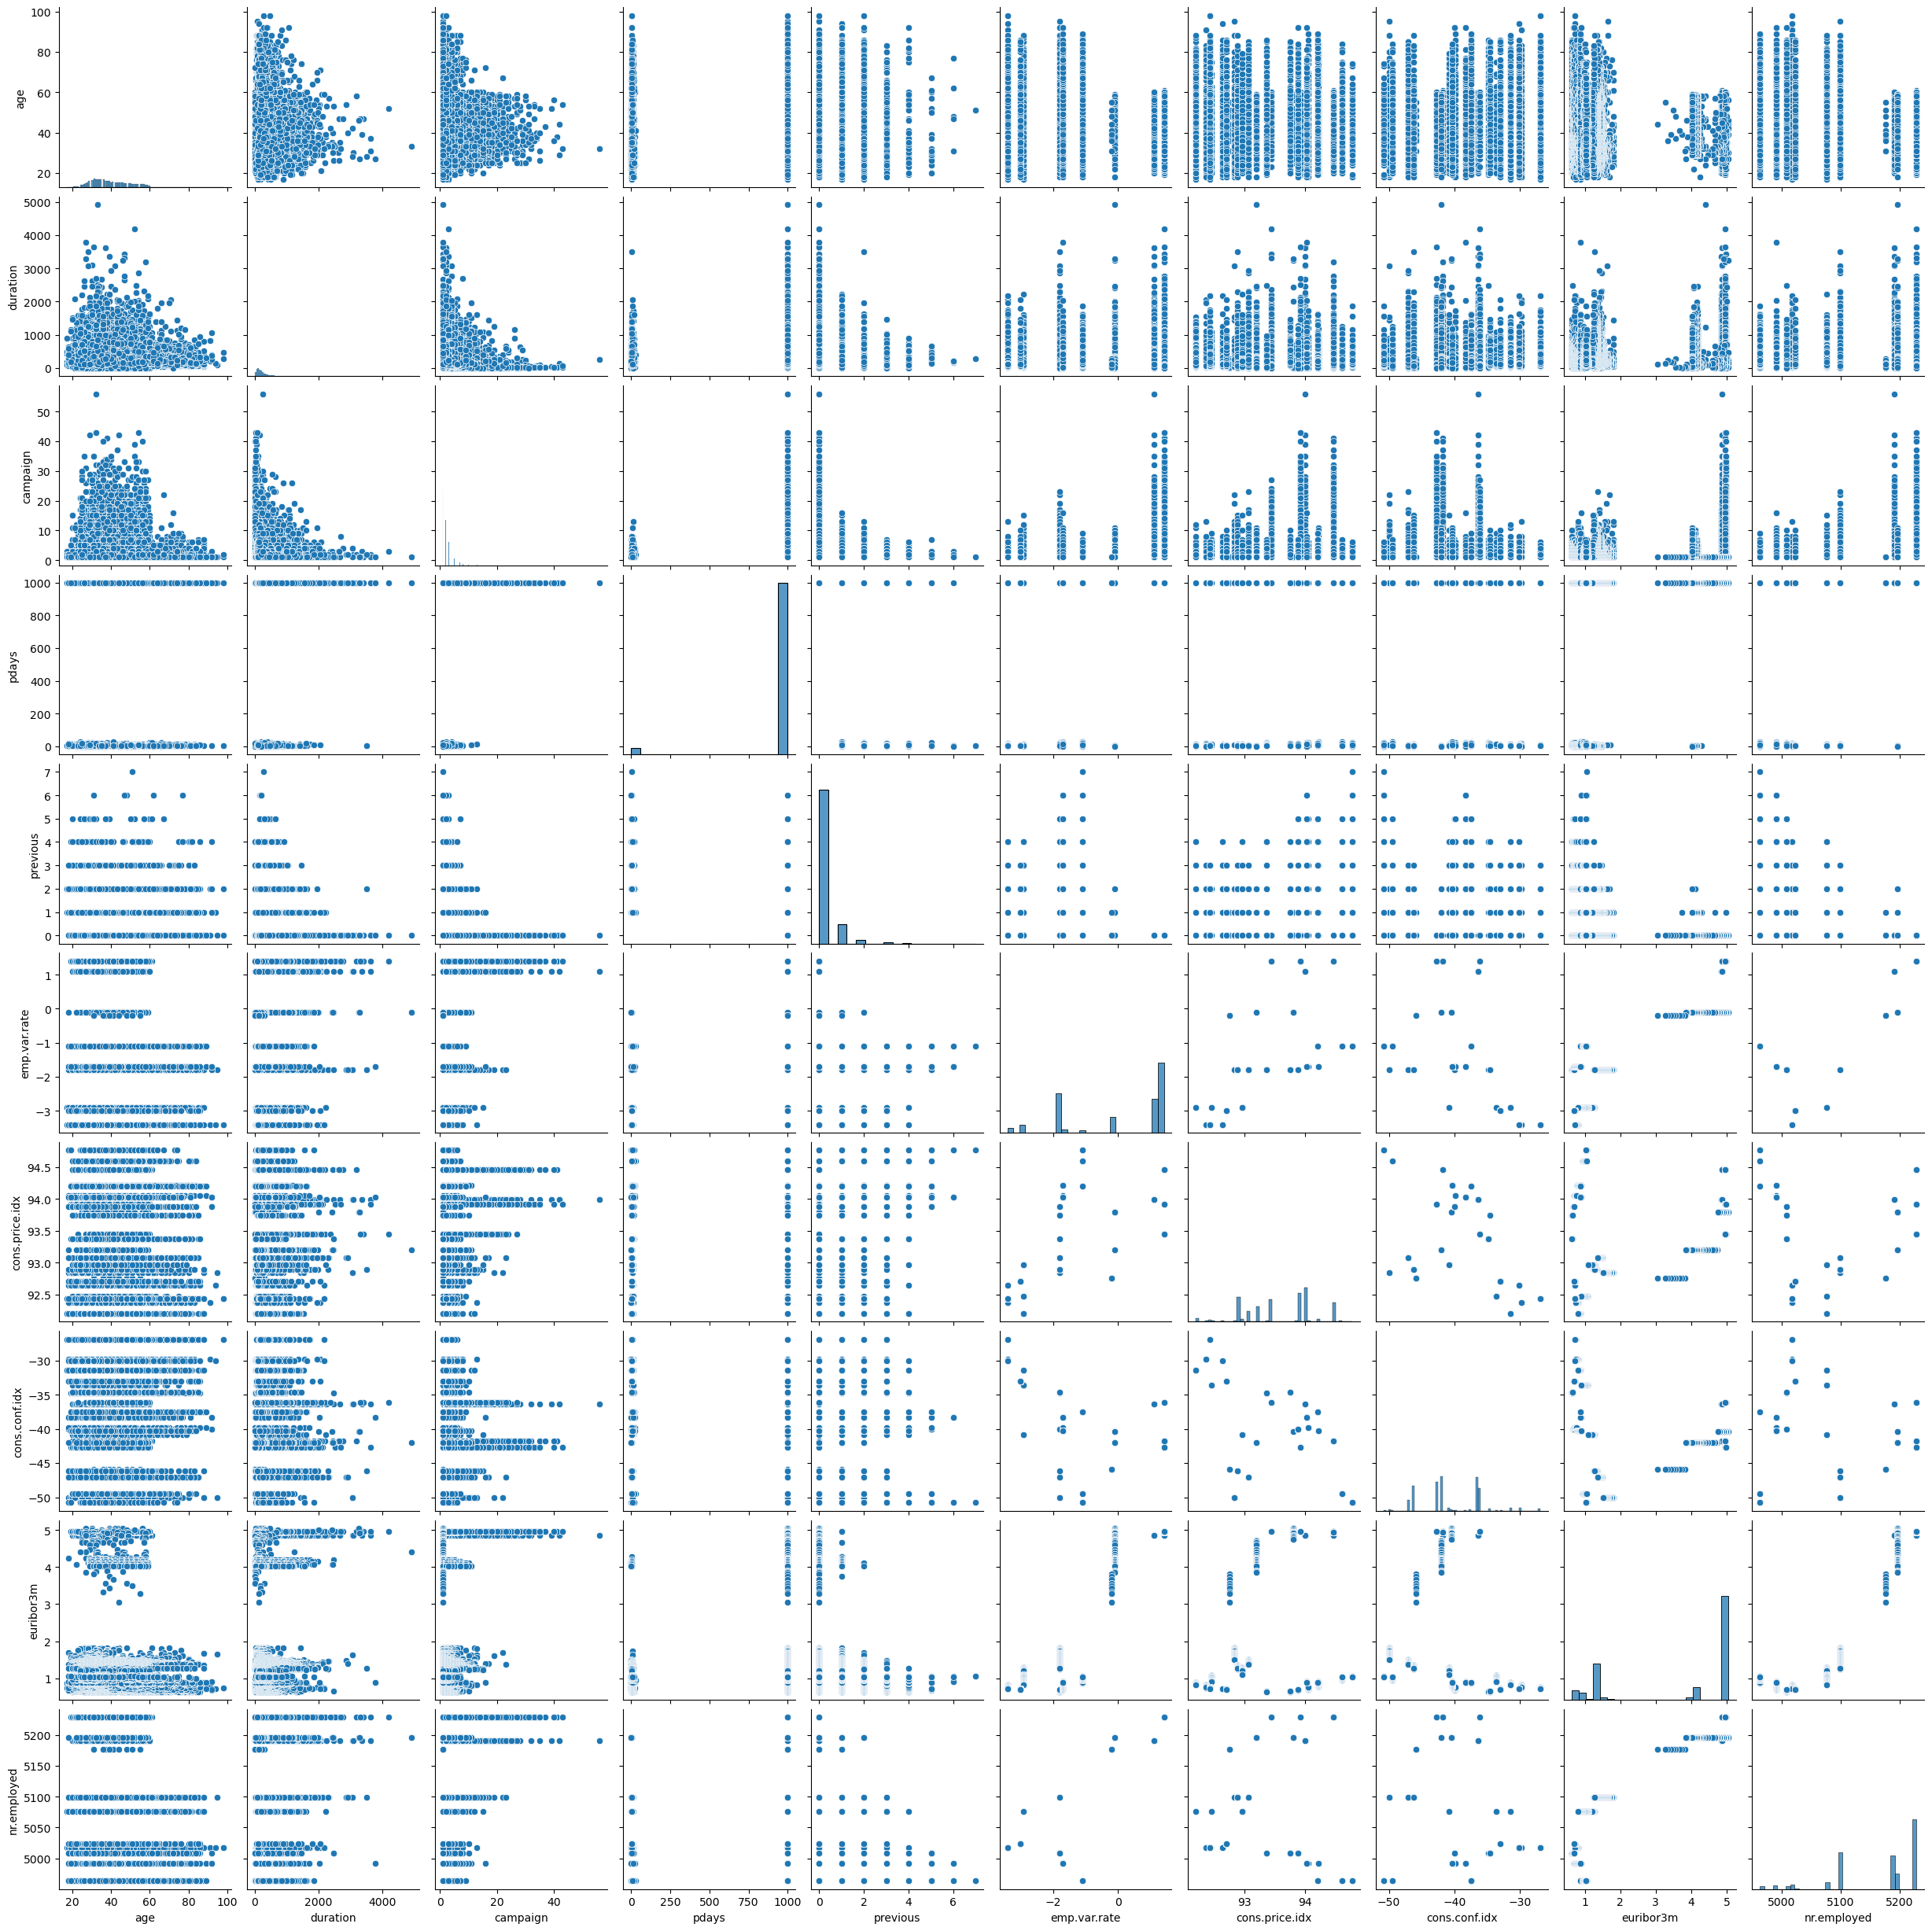

In [24]:
sns.pairplot(bank)
plt.show()

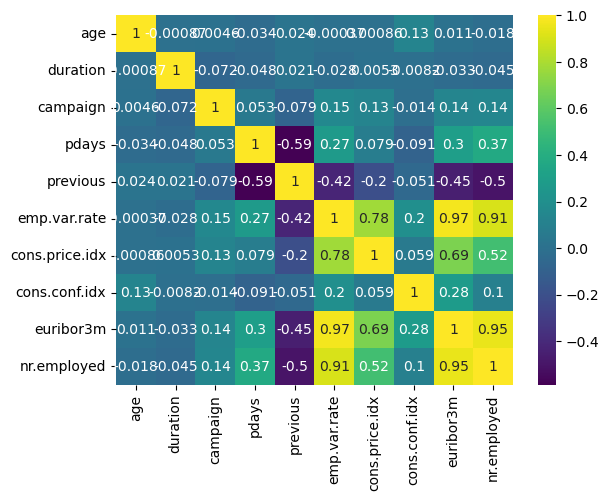

In [25]:
sns.heatmap(bank.corr(), annot=True, cmap='viridis')
plt.show()

In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [27]:
# 'y' is our target variable
target_variable = 'y'

# Select only categorical columns
categorical_columns = bank.select_dtypes(include=['object']).columns

# Create a list to store results
chi2_results = []

# Perform Chi-squared test for each categorical column with the target variable
for col in categorical_columns:
    if col != target_variable:
        contingency_table = pd.crosstab(bank[col], bank[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.append(
            {
            'Column': col,
            'Chi-squared': '{:.2f}'.format(chi2),
            'P-value': '{:.4f}'.format(p)
            }
        )

# Display the results
results_df = pd.DataFrame(chi2_results)
print(results_df)

        Column Chi-squared P-value
0          job      961.24  0.0000
1      marital      122.66  0.0000
2    education      193.11  0.0000
3      default      406.58  0.0000
4      housing        5.68  0.0583
5         loan        1.09  0.5787
6      contact      862.32  0.0000
7        month     3101.15  0.0000
8  day_of_week       26.14  0.0000
9     poutcome     4230.52  0.0000


In [28]:
# A higher Chi-squared score indicates a larger difference 
# between the observed and expected frequencies 
# in the contingency table, supporting the alternative hypothesis.

In [29]:
# High p-value: 
# Suggests that there isn't enough evidence to reject the null hypothesis, 
# and no significant association is found.

In [30]:
from scipy.stats import ttest_ind

In [31]:
numerical_columns = bank.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [32]:
target_variable = 'y'
numerical_columns = bank.select_dtypes(include=['int64', 'float64']).columns

t_test_results = []

for num_col in numerical_columns:
    group_yes = bank[bank[target_variable] == 'yes'][num_col]
    group_no = bank[bank[target_variable] == 'no'][num_col]

    # Perform a t-test
    t_statistic, p_value = ttest_ind(group_yes, group_no, equal_var=False)  # Assuming unequal variance

    t_test_results.append({
        'Variable': num_col,
        'T-statistic': t_statistic,
        'P-value': '{:.2f}'.format(p_value)  # Format p-value to display only 2 decimal places
    })

# Display the results
results_df = pd.DataFrame(t_test_results)
print(results_df)

         Variable  T-statistic P-value
0             age     4.779543    0.00
1        duration    55.500166    0.00
2        campaign   -20.249378    0.00
3           pdays   -32.250869    0.00
4        previous    28.125534    0.00
5    emp.var.rate   -59.136663    0.00
6  cons.price.idx   -24.082467    0.00
7   cons.conf.idx     8.636458    0.00
8       euribor3m   -62.579872    0.00
9     nr.employed   -60.975156    0.00


In [33]:
# The farther the t-statistic is from zero, 
# the more evidence you have against the null hypothesis.

# If the t-statistic is positive, it suggests that 
# the mean of the first group (specified first in the t-test) is higher.

# If the t-statistic is negative, 
# it suggests that the mean of the second group is higher.

# A smaller p-value (typically below a significance level, e.g., 0.05) 
# suggests stronger evidence against the null hypothesis.

# Preprocessing

In [34]:
# Remove duplicates permentately 
bank.drop_duplicates(inplace=True)

In [35]:
# Duration of the call is subjective term, so it is been asked to remove it.
bank.drop('duration', axis=1, inplace=True)

In [36]:
# High correlation has to be removed
bank.drop(['euribor3m', 'nr.employed'], axis=1, inplace=True)

In [37]:
# In this "unknown" value is a null value.
# So, we replace it with Null value. 
bank.replace('unknown', np.nan, inplace=True)

In [38]:
bank.duplicated().sum()

2344

In [39]:
# Remove duplicates permentately 
bank.drop_duplicates(inplace=True)

In [40]:
# Replace null value

numerical_columns = bank.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = bank.select_dtypes(include=['object']).columns

# Replace missing values in numerical columns with the median
bank[numerical_columns] = bank[numerical_columns].fillna(bank[numerical_columns].mode())

# Replace missing values in categorical columns with the mode
bank[categorical_columns] = bank[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

bank = pd.DataFrame(bank)

In [41]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [42]:
bank = pd.DataFrame(bank)

In [43]:
# Handling outliers of all columns 
# find handling outliers using IQR?

In [44]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes


In [45]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38832 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38832 non-null  int64  
 1   job             38832 non-null  object 
 2   marital         38832 non-null  object 
 3   education       38832 non-null  object 
 4   default         38832 non-null  object 
 5   housing         38832 non-null  object 
 6   loan            38832 non-null  object 
 7   contact         38832 non-null  object 
 8   month           38832 non-null  object 
 9   day_of_week     38832 non-null  object 
 10  campaign        38832 non-null  int64  
 11  pdays           38832 non-null  int64  
 12  previous        38832 non-null  int64  
 13  poutcome        38832 non-null  object 
 14  emp.var.rate    38832 non-null  float64
 15  cons.price.idx  38832 non-null  float64
 16  cons.conf.idx   38832 non-null  float64
 17  y               38832 non-null 

In [46]:
## using IQR to remove the outliers
IQR_age = stats.iqr(bank.age, interpolation = 'midpoint')

Q1_age = bank.age.quantile(0.25)

Q3_age = bank.age.quantile(0.75)

min_limit_age = Q1_age - 1.5*IQR_age

max_limit_age = Q3_age + 1.5*IQR_age

bank.loc[(bank.age > max_limit_age) | (bank.age < min_limit_age), 'age']=np.median(bank.age)

In [47]:
# Changing categorical data to Numeric data using LabelEncoder

categorical_columns = bank.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    bank[col] = label_encoder.fit_transform(bank[col])

# Display the Data after label encoding
print(bank)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        0        0     0        1      6   
2       37    7        1          3        0        1     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     1        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        1          5        0        1     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        1     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   38    5        1          5        0        1     0        0      7   

       day_of_week  campaign  pdays  previous  pout

In [48]:
# Checking data type of datatypes after label encoding
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38832 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38832 non-null  int64  
 1   job             38832 non-null  int32  
 2   marital         38832 non-null  int32  
 3   education       38832 non-null  int32  
 4   default         38832 non-null  int32  
 5   housing         38832 non-null  int32  
 6   loan            38832 non-null  int32  
 7   contact         38832 non-null  int32  
 8   month           38832 non-null  int32  
 9   day_of_week     38832 non-null  int32  
 10  campaign        38832 non-null  int64  
 11  pdays           38832 non-null  int64  
 12  previous        38832 non-null  int64  
 13  poutcome        38832 non-null  int32  
 14  emp.var.rate    38832 non-null  float64
 15  cons.price.idx  38832 non-null  float64
 16  cons.conf.idx   38832 non-null  float64
 17  y               38832 non-null 

In [49]:
# Checking complete dataset after label encoding
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,0
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1


In [50]:
# Columns Needed Scaling
scaling = bank.iloc[:, :-1]

In [51]:
scaling

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8


In [52]:
# Standard Scaler

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
bank_data = scaler.fit_transform(scaling)

banks = pd.DataFrame(bank_data, columns=['age', 'job', 'marital', 'education', 
                                  'default', 'housing', 'loan',
                                  'contact', 'month', 'day_of_week', 
                                  'campaign', 'pdays',
                                  'previous', 'poutcome',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx'])
banks

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,1.684059,-0.185088,-0.271893,-1.775605,-0.00879,-1.099374,-0.434003,1.298474,0.749066,-0.711693,-0.577216,0.201419,-0.357812,0.194028,0.663457,0.716542,0.886434
1,1.787415,0.944106,-0.271893,-0.334286,-0.00879,-1.099374,-0.434003,1.298474,0.749066,-0.711693,-0.577216,0.201419,-0.357812,0.194028,0.663457,0.716542,0.886434
2,-0.279695,0.944106,-0.271893,-0.334286,-0.00879,0.909609,-0.434003,1.298474,0.749066,-0.711693,-0.577216,0.201419,-0.357812,0.194028,0.663457,0.716542,0.886434
3,0.030372,-1.031983,-0.271893,-1.295165,-0.00879,-1.099374,-0.434003,1.298474,0.749066,-0.711693,-0.577216,0.201419,-0.357812,0.194028,0.663457,0.716542,0.886434
4,1.684059,0.944106,-0.271893,-0.334286,-0.00879,-1.099374,2.304130,1.298474,0.749066,-0.711693,-0.577216,0.201419,-0.357812,0.194028,0.663457,0.716542,0.886434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,-0.176339,0.379509,-0.271893,0.626593,-0.00879,0.909609,-0.434003,-0.770135,1.180744,-1.426700,-0.577216,0.201419,-0.357812,0.194028,-0.728654,2.037671,-2.208743
38828,0.650504,-0.749685,-0.271893,0.626593,-0.00879,-1.099374,-0.434003,-0.770135,1.180744,-1.426700,-0.577216,0.201419,-0.357812,0.194028,-0.728654,2.037671,-2.208743
38829,1.684059,0.379509,-0.271893,1.107033,-0.00879,0.909609,-0.434003,-0.770135,1.180744,-1.426700,-0.223926,0.201419,-0.357812,0.194028,-0.728654,2.037671,-2.208743
38830,0.443793,1.508703,-0.271893,0.626593,-0.00879,-1.099374,-0.434003,-0.770135,1.180744,-1.426700,-0.577216,0.201419,-0.357812,0.194028,-0.728654,2.037671,-2.208743


In [53]:
# Applying scaling to all columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the data and store the result in the same variable
min_max_scaler = scaler.fit_transform(banks)

final_scaled = pd.DataFrame(min_max_scaler, columns=['age', 'job', 'marital', 'education', 
                                                     'default', 'housing', 'loan',
                                                     'contact', 'month', 'day_of_week',
                                                     'campaign', 'pdays',
                                                     'previous', 'poutcome',
                                                     'emp.var.rate', 'cons.price.idx',
                                                     'cons.conf.idx'])

In [54]:
final_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,0.750000,0.3,0.5,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
1,0.769231,0.7,0.5,0.500000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
2,0.384615,0.7,0.5,0.500000,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
3,0.442308,0.0,0.5,0.166667,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
4,0.750000,0.7,0.5,0.500000,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,0.403846,0.5,0.5,0.833333,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000
38828,0.557692,0.1,0.5,0.833333,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000
38829,0.750000,0.5,0.5,1.000000,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.0,0.000000,0.5,0.479167,1.000000,0.00000
38830,0.519231,0.9,0.5,0.833333,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000


In [55]:
# Separating target and independent variables
X = final_scaled                  # Independent variables 
y = bank['y'].astype('int64')     # Target variable

In [56]:
# Splitting the data into Train and Test data
# Train data will be used to train model
# Test data will be used to check trained model and to evaulate the model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [57]:
# Checking independent variables of training dataset
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
13177,0.615385,0.0,0.5,0.500000,0.0,1.0,0.0,0.0,0.333333,0.00,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912
36830,0.692308,0.0,0.0,1.000000,0.0,1.0,0.0,1.0,0.555556,0.50,0.000000,1.000000,0.285714,0.0,0.333333,0.455183,0.669456
31094,0.711538,0.4,0.0,0.833333,0.0,1.0,0.0,0.0,0.666667,0.75,0.000000,1.000000,0.000000,0.5,0.333333,0.269680,0.192469
10241,0.326923,0.2,1.0,0.833333,0.0,0.0,0.0,1.0,0.444444,0.75,0.018182,1.000000,0.000000,0.5,1.000000,0.882307,0.376569
7033,0.153846,0.1,0.5,0.333333,0.0,1.0,0.0,1.0,0.666667,0.00,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.346154,0.5,0.5,0.833333,0.0,0.0,0.0,1.0,0.666667,1.00,0.018182,1.000000,0.000000,0.5,0.937500,0.698753,0.602510
11284,0.269231,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.444444,0.00,0.036364,1.000000,0.000000,0.5,1.000000,0.882307,0.376569
38158,0.326923,0.9,1.0,0.333333,0.0,0.0,0.0,0.0,0.111111,0.25,0.036364,0.006006,0.428571,1.0,0.354167,0.711613,0.523013
860,0.500000,0.0,0.5,0.500000,0.0,0.0,0.0,1.0,0.666667,1.00,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510


In [58]:
# This dataset will be used to evaluate trained model and with actual output
X_test 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
16171,0.711538,0.9,0.5,0.833333,0.0,1.0,0.0,1.0,0.333333,0.00,0.000000,1.000000,0.000000,0.5,1.000000,0.669135,0.338912
10628,0.730769,0.0,0.5,0.500000,0.0,1.0,0.0,1.0,0.444444,0.50,0.000000,1.000000,0.000000,0.5,1.000000,0.882307,0.376569
10013,0.634615,0.0,0.5,0.500000,0.0,1.0,0.0,1.0,0.444444,0.75,0.000000,1.000000,0.000000,0.5,1.000000,0.882307,0.376569
11661,0.500000,0.1,0.5,0.333333,0.0,1.0,0.0,1.0,0.333333,0.50,0.000000,1.000000,0.000000,0.5,1.000000,0.669135,0.338912
1467,0.346154,0.9,0.5,1.000000,0.0,1.0,0.0,1.0,0.666667,0.50,0.036364,1.000000,0.000000,0.5,0.937500,0.698753,0.602510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6263,0.365385,0.4,1.0,1.000000,0.0,1.0,0.0,1.0,0.666667,1.00,0.036364,1.000000,0.000000,0.5,0.937500,0.698753,0.602510
31320,0.538462,0.1,0.5,0.000000,0.0,1.0,0.0,0.0,0.666667,0.75,0.018182,1.000000,0.142857,0.0,0.333333,0.269680,0.192469
29982,0.269231,0.7,1.0,0.500000,0.0,0.0,0.0,0.0,0.666667,0.00,0.018182,1.000000,0.000000,0.5,0.333333,0.269680,0.192469
25224,0.576923,0.6,0.5,0.333333,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.000000,0.000000,0.5,0.687500,0.389322,0.368201


In [59]:
# Checking shape of training dataset
print("Shape of training dataset is: ", X_train.shape)

Shape of training dataset is:  (31065, 17)


In [60]:
# Checking the number of observations which supports "yes" or "no" category
y_train.value_counts()

0    27328
1     3737
Name: y, dtype: int64

In [61]:
# Data is highly unbalanced
# Observations of "1" is very low

In [62]:
# Apply SMOTE Technique to balance the data
from imblearn.over_sampling import SMOTE
from collections import Counter

In [63]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 27328, 1: 3737})
SMOTE Classes Counter({0: 27328, 1: 27328})


In [64]:
# Checking the observation which supports "yes" or "no" category after SMOTE
y_smote.value_counts()

0    27328
1    27328
Name: y, dtype: int64

# Logistics Regression

In [65]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training dataset
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
# Make predictions on the test data
y_pred_log = model.predict(X_test)

In [67]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.90
Confusion Matrix:
[[6811   98]
 [ 665  193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6909
           1       0.66      0.22      0.34       858

    accuracy                           0.90      7767
   macro avg       0.79      0.61      0.64      7767
weighted avg       0.88      0.90      0.88      7767



#### Report of above cell (refer only if output are visible)
Accuracy: 0.90
Confusion Matrix:
[[7183  120]
 [ 683  252]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7303
           1       0.68      0.27      0.39       935

    accuracy                           0.90      8238
   macro avg       0.80      0.63      0.67      8238
weighted avg       0.89      0.90      0.88      8238

In [68]:
y_test.value_counts()

0    6909
1     858
Name: y, dtype: int64

In [69]:
y_test

17191    0
11160    0
10511    0
12229    0
1515     0
        ..
6623     0
33492    0
32092    0
27106    0
40958    0
Name: y, Length: 7767, dtype: int64

In [70]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.97110018, 0.02889982],
       [0.94665608, 0.05334392],
       [0.94381503, 0.05618497],
       ...,
       [0.8684648 , 0.1315352 ],
       [0.93834818, 0.06165182],
       [0.29712188, 0.70287812]])

In [71]:
# changing threshold and predicting 
print('prediction with threshold 0.2 :') 
y_pred_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.2).astype(int) 
print(y_pred_new_threshold)

prediction with threshold 0.2 :
[0 0 0 ... 0 0 1]


In [72]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_new_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
class_report = classification_report(y_test, y_pred_new_threshold)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.86
Confusion Matrix:
[[6195  714]
 [ 382  476]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6909
           1       0.40      0.55      0.46       858

    accuracy                           0.86      7767
   macro avg       0.67      0.73      0.69      7767
weighted avg       0.88      0.86      0.87      7767



In [73]:
# Training model of balanced dataset by SMOTE
model1 = LogisticRegression()

# Fit the model on the resampled training data
model1.fit(X_smote, y_smote)

LogisticRegression()

In [74]:
y_pred_log_sm = model1.predict(X_test)

In [75]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log_sm)
conf_matrix = confusion_matrix(y_test, y_pred_log_sm)
class_report = classification_report(y_test, y_pred_log_sm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.78

Confusion Matrix:

[[5526 1383]
 [ 290  568]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6909
           1       0.29      0.66      0.40       858

    accuracy                           0.78      7767
   macro avg       0.62      0.73      0.64      7767
weighted avg       0.88      0.78      0.82      7767



# K-Means Classifier Algorithm

In [76]:
# Initialise the model with K as 3
model4 = KMeans(n_clusters=3, random_state=15)

# Training the model
model4.fit(X_train)

KMeans(n_clusters=3, random_state=15)

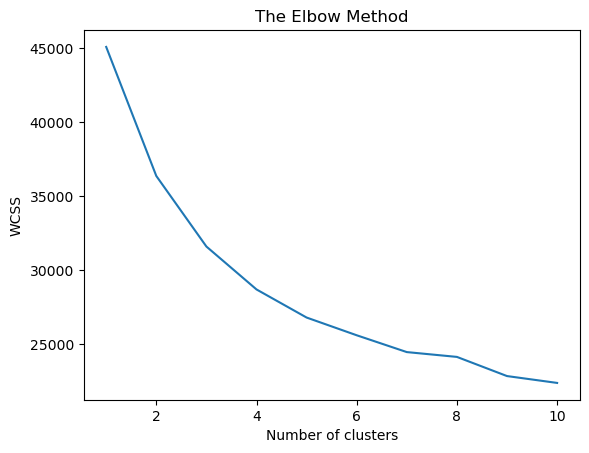

In [77]:
# Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
# Initialise the model with K as 3
model5 = KMeans(n_clusters=2, random_state=15)

# Training the model
model5.fit(X_train)

KMeans(n_clusters=2, random_state=15)

In [79]:
y_pred_kmeans = model5.predict(X_test)

In [80]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_kmeans)
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)
class_report = classification_report(y_test, y_pred_kmeans)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.56

Confusion Matrix:

[[4178 2731]
 [ 718  140]]

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.60      0.71      6909
           1       0.05      0.16      0.08       858

    accuracy                           0.56      7767
   macro avg       0.45      0.38      0.39      7767
weighted avg       0.76      0.56      0.64      7767



# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #it calculates the proportion of misclassified samples in the test set.

In [83]:
error_rate

[0.1647997940002575,
 0.11162611046736191,
 0.1201235998455002,
 0.10673361658297927,
 0.1104673619157976,
 0.10570361787047766,
 0.10827861465173169,
 0.10402986996266254,
 0.10441611947985065,
 0.10171237285953393]

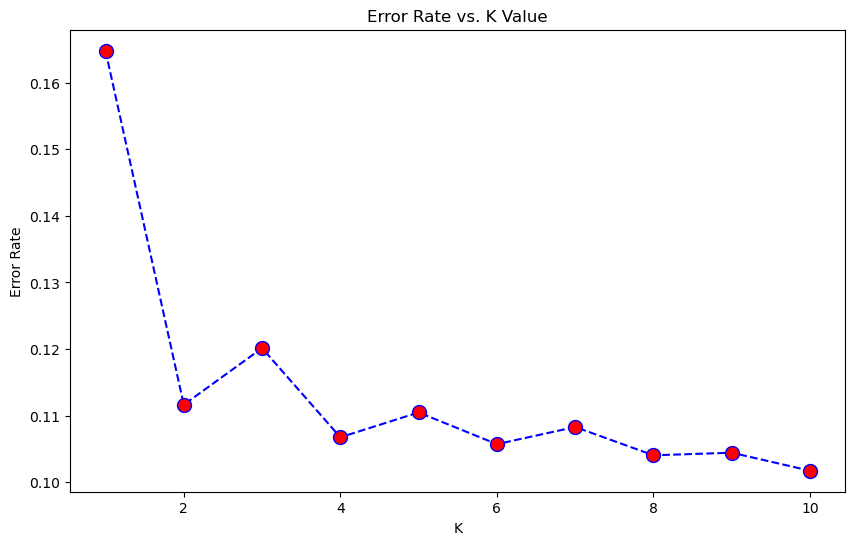

In [84]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [85]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train,y_train)
    Y_pred = knn2.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Y_pred))

In [86]:
acc

[0.8352002059997425,
 0.8883738895326381,
 0.8798764001544999,
 0.8932663834170207,
 0.8895326380842024,
 0.8942963821295223,
 0.8917213853482683,
 0.8959701300373375,
 0.8955838805201494,
 0.8982876271404661]

Maximum accuracy: 0.8982876271404661 at K = 9


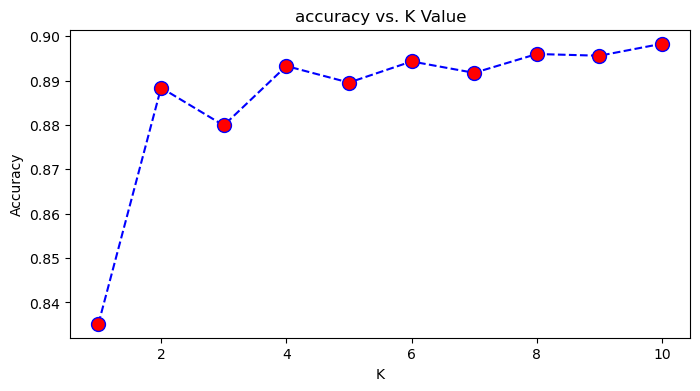

In [87]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)))

In [88]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
y_pred_knn = knn.predict(X_test)

In [90]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[6797  112]
 [ 678  180]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6909
           1       0.62      0.21      0.31       858

    accuracy                           0.90      7767
   macro avg       0.76      0.60      0.63      7767
weighted avg       0.88      0.90      0.88      7767



# Support Vector Machine

In [91]:
# Initialise the objective of model 
svclassifier = SVC() 

# Fit the model with training data
svclassifier.fit(X_train, y_train)

SVC()

In [92]:
# Predict the output using trained data
y_pred_svm = svclassifier.predict(X_test)

In [93]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[6837   72]
 [ 681  177]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6909
           1       0.71      0.21      0.32       858

    accuracy                           0.90      7767
   macro avg       0.81      0.60      0.63      7767
weighted avg       0.89      0.90      0.88      7767



# Decision Tree

In [94]:
# Initialise the model objective
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
# Predict the output for test dataset
y_pred_tree = dt.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.83

Confusion Matrix:

[[6136  773]
 [ 572  286]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6909
           1       0.27      0.33      0.30       858

    accuracy                           0.83      7767
   macro avg       0.59      0.61      0.60      7767
weighted avg       0.84      0.83      0.83      7767



In [ ]:
%%time
# Print time taken to execute this cell

# Dictionary of parameter to try and test for decision tree 
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4, 5, 6, 7],     
    "min_samples_leaf":list(range(1, 10))
    
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, 
                       scoring="accuracy",           # Evaluation metric to evaluate the model
                       n_jobs=-1,                    # Numbers of cores used to execute this code
                       verbose=1, cv=3)

# Fit the model with each parameters
tree_cv.fit(X_train, y_train)

# It will print Best Parameters
best_params = tree_cv.best_params_ 
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4104 candidates, totalling 12312 fits


In [ ]:
# Passing best parameter to decision tree
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf= 8, min_samples_split=2, splitter='random')

# Training model with best parameter
dt1.fit(X_train, y_train)

In [ ]:
# Predicton using Decision Tree
y_pred_hyper_decision = dt1.predict(X_test)

In [ ]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_hyper_decision)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_decision)
class_report = classification_report(y_test, y_pred_hyper_decision)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

# RandomForest Algorithm

In [ ]:
# Object creation, taking 200 decision tree in random forest 
rf_clf = RandomForestClassifier(n_estimators=200) 

# Training model
rf_clf.fit(X_train,y_train)

In [ ]:
# Prediction using Random Forest Algorithm
y_pred_forest = rf_clf.predict(X_test)

In [ ]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
class_report = classification_report(y_test, y_pred_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

In [ ]:
%%time
# Time taken to execute this cell

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

In [ ]:
rf_clf2 = RandomForestClassifier(bootstrap = True, max_depth= 10, max_features= 'sqrt', min_samples_leaf=2, min_samples_split= 10, n_estimators=200, random_state= 42)
rf_clf2.fit(X_train, y_train)

In [ ]:
y_pred_hyper_forest = rf_clf2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_hyper_forest)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_forest)
class_report = classification_report(y_test, y_pred_hyper_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

# Bagging Algorithm

In [ ]:
LR = LogisticRegression()

In [ ]:
# Initialise the Bagging Classifier Model using base model of Logistic Regression
model_bagg = BaggingClassifier(base_estimator = LR, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

In [ ]:
y_pred_bagg_log = model_bagg.predict(X_test)

In [ ]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_bagg_log)
conf_matrix = confusion_matrix(y_test, y_pred_bagg_log)
class_report = classification_report(y_test, y_pred_bagg_log)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

# Bagging using KNN

In [ ]:
# Create a KNN classifier with 3 neighbors
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Initialise the Bagging Classifier Model using base model of KNN
model_bagg = BaggingClassifier(base_estimator=KNN, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

In [ ]:
y_pred_bagg_knn = model_bagg.predict(X_test)

In [ ]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_bagg_knn)
conf_matrix = confusion_matrix(y_test, y_pred_bagg_knn)
class_report = classification_report(y_test, y_pred_bagg_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

In [ ]:
# Dictionary of model to fit model in Bagging Classifier
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# Number of base classifiers in the ensemble
n_classifiers = len(classifiers)

# Create a bagging ensemble for each base classifier and display results
for name, classifier in classifiers.items():
    
    # Create a BaggingClassifier with the current base classifier
    bagging_classifier = BaggingClassifier(base_estimator=classifier, n_estimators=100, random_state=42)

    # Perform cross-validation to evaluate the classifier
    scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5)  # Replace X and y with your actual data
    average_score = np.mean(scores)

    # Display the results
    print(f'{name} with Bagging - Average Accuracy: {average_score:.2f}')

Decision Tree with Bagging - Average Accuracy: 0.91
K-Nearest Neighbors with Bagging - Average Accuracy: 0.90
Support Vector Machine with Bagging - Average Accuracy: 0.90

# Boosting Technique

In [ ]:
# Initialise the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Fit the Gradient Boosting Classifier
gbm.fit(X_train,y_train)

In [ ]:
y_pred_gbm = gbm.predict(X_test)

In [ ]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_gbm)
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
class_report = classification_report(y_test, y_pred_gbm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import Random

In [ ]:

param_grid = {'gamma': [0,0.1, 0.2, 0.4, 0.8, 1.6, 3.2],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2],
              'max_depth': [5, 6, 7, 8, 9, 10],
              'n_estimators': [50, 100, 150, 200],
              'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4],
              'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6]}

XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)
rcv = RandomizedSearchCV(estimator=XGB, 
                        scoring='accuracy', 
                        param_distributions=param_grid, 
                        n_iter=100, 
                        cv=3, 
                        verbose=2, 
                        random_state=42, 
                        n_jobs=-1)

rcv.fit(X_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.4, 'reg_alpha': 0.8, 'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 3.2})

In [ ]:
# Building model using best parameter
XGB2 = XGBClassifier(reg_lambda= 0.4, reg_alpha= 0.8, n_estimators=150, max_depth=10, learning_rate=0.031, gamma=1.6)
XGB2.fit(X_train, y_train)

In [ ]:
y_pred_hyper_XGB = XGB2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_hyper_XGB)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_XGB)
class_report = classification_report(y_test, y_pred_hyper_XGB)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

# Detailed Report on Customer Data and Term Deposit Campaign

- **General Customer Profile:**

    - **Demographics:**
    
        **1. Age:** Varies between 17 and 98 years (wide range).
        
        **2. Marital Status:** Primarily married, followed by single and divorced.
       
        **3. Education:** Mostly university degree holders, followed by high school and basic education.
        
        **4. Occupation:** Mostly administrators, followed by blue-collar workers and technicians.
        
        **5. Housing:** Most customers have housing.
        
        **6. Loans:** Most customers do not have loans.
        
        **7. Phones:** Over 25,000 have cellular phones, around 15,000 have landlines.
      
      
    - **Campaign Contact:**
    
        1. Most contacts occurred in May, July, and August.
        2. Few contacts in September, March, and December.
        3. On average, clients contacted 3 times.
        4. Over 35,000 clients not contacted during previous campaign.
        5. Around 86% of clients not contacted before this campaign.
    
    
    - **Default History:**
    
        1. Only 3 defaulters observed.
        2. None of the defaulters opted for term deposit.


## Term Deposit Opt-in:
   **1. Age:** Most individuals who agreed are aged 23-45.
   
   **2. Occupation:** Similar to overall customer profile, administrators, blue-collar workers, and technicians dominate.
   **3. Marital Status:** Mostly married, with some divorced individuals (around 11%).
   **4. Education:** University degree holders most likely to opt-in (around 13%), followed by professional courses and high school.
   **5. Defaulters:** None opted for term deposit.
   **6. Loans:** Most term deposit opt-ins do not have loans.
   **7. Phones:** Cellular phone users slightly more likely to opt-in (around 14%).
   **8. Contact Frequency:** Increased number of calls correlates with lower opt-in percentage.
   **9. Early Contact:** Clients contacted in the first 15 days more likely to opt-in.
   **10. Previous Campaign Contact:** 91% of opt-ins not contacted during previous campaign.
   **11. Pre-Campaign Contact:** 86% of opt-ins not contacted before this campaign.


## Key Insights:
    1. The target audience for term deposit is primarily middle-aged, married, university-educated individuals with stable employment and housing.
    2. Targeting younger and first-time contacted clients could be beneficial.
    3. Optimizing contact frequency and focusing on the first 15 days of the campaign might increase opt-in rates.
    4. Reaching out to individuals not contacted in previous campaigns could be a valuable untapped market.


## Recommendations:
    1. Tailor marketing efforts to target the identified demographics and psychographics of term deposit opt-ins.
    2. Implement strategies to reach first-time contacted clients and those contacted early in the campaign.
    3. Analyze the relationship between contact frequency and opt-in rates to optimize future campaigns.
    4. Focus on reaching clients not contacted in previous campaigns to expand the potential customer base.

This report provides a comprehensive overview of the customer data and insights into the term deposit campaign. By leveraging these insights, you can refine your marketing strategies and improve the success of future campaigns.

| Algorithm	                   | Accuracy	  | Precision(Class 1)	  | Recall (Class 1)	| F1-Score (Class 1)
|------------------------------|--------------|-----------------------|----------------------|------------------|
Logistic Regression (Default Threshold)|	0.9	| 0.66	| 0.21	| 0.32
|------------------------------|--------------|-----------------------|----------------------|------------------|
Logistic Regression (Threshold 0.2)	| 0.85	| 0.39	| 0.53	| 0.45
|------------------------------|--------------|-----------------------|----------------------|------------------|
Logistic Regression (SMOTE)	| 0.8	| 0.32	| 0.61	| 0.42
|------------------------------|--------------|-----------------------|----------------------|------------------|
KMeans	| 0.71	| 0.24 | 0.68	| 0.36
|------------------------------|--------------|-----------------------|----------------------|------------------|
KNN	| 0.89	| 0.59	| 0.21	| 0.3
|------------------------------|--------------|-----------------------|----------------------|------------------|
SVC	| 0.89	| 0.68	| 0.18	| 0.28
|------------------------------|--------------|-----------------------|----------------------|------------------|
Random Forest (No Hypertuning)	| 0.9	| 0.64	| 0.26	| 0.37
|------------------------------|--------------|-----------------------|----------------------|------------------|
Random Forest (Hypertuned)	| 0.88	| 0.5	| 0.29	| 0.37
|------------------------------|--------------|-----------------------|----------------------|------------------|
Bagging (Logistic Regression)	| 0.9	| 0.66	| 0.21	| 0.32
|------------------------------|--------------|-----------------------|----------------------|------------------|
Bagging (KNN)	| 0.88	| 0.47	| 0.27	| 0.34
|------------------------------|--------------|-----------------------|----------------------|------------------|
Gradient Boosting	| 0.9	| 0.65	| 0.23	| 0.33
|------------------------------|--------------|-----------------------|----------------------|------------------|
Gradient Boosting (Hypertuned)	| 0.9	| 0.63	| 0.26	| 0.37
|------------------------------|--------------|-----------------------|----------------------|------------------|

## DOMAIN ANALYSIS

In the context of direct phone call marketing campaigns for term deposits, the focus is often on reducing false positives or false negatives, depending on the specific business goals and constraints. Let's discuss these two types of errors:
    
1. **False Positives (Type I Error):**
   - Definition: A false positive occurs when the model predicts that a customer will subscribe to a term deposit, but in reality, the customer does not subscribe.
   - Impact: This type of error may lead to unnecessary costs and resources being allocated for marketing to customers who are unlikely to subscribe. It can also result in customer dissatisfaction if they receive irrelevant promotional materials.

2. **False Negatives (Type II Error):**
   - **Definition:** A false negative occurs when the model predicts that a customer will not subscribe to a term deposit, but in reality, the customer does subscribe.
   - **Impact:** This type of error can be more costly as the bank may miss opportunities to promote term deposits to customers who are actually interested. It may result in lost revenue and hinder the bank's ability to maximize the effectiveness of its marketing campaigns.

In the case of direct phone call marketing campaigns, striking a balance between these two types of errors is crucial. The trade-off between false positives and false negatives can be managed by adjusting the classification threshold of the model. 

## The models with the best overall performance for your term deposit prediction campaign are:

**1. Gradient Boosting:**
    - Offers consistently high accuracy (around 90%) in both base and hypertuned versions.
    - Maintains a decent balance between precision and recall, prioritizing the identification of potential subscribers (higher recall).
    * Proven effectiveness in handling imbalanced datasets like yours.

**2. Logistic Regression:**
    - Achieves similar accuracy to Gradient Boosting (around 90%) with the default threshold.
    - Offers higher precision for class 1 (identifying actual subscriptions) which might be valuable depending on cost considerations.
    - Requires careful threshold adjustments to optimize the recall-precision trade-off.

**3. Random Forest:**
    - Demonstrates good accuracy (around 90%) without hypertuning.
    - Similar to Logistic Regression, offers higher precision for class 1 with potential advantages depending on cost structure.
    - May require hypertuning for further optimization.

## Choosing the best model for your specific scenario depends on your priorities and cost structure:
- **Prioritize identifying potential subscribers (higher recall):** Select Gradient Boosting.
- **Prioritize accurately identifying actual subscriptions (higher precision):** Consider Logistic Regression or Random Forest with threshold adjustments, depending on cost implications of false positives.

<div style="text-align: center; font-family: 'Your Preferred Font', cursive; font-size: 40px; color: purple; max-width: 100%; margin: 0 auto;">Thank You</div>